## Problem

$ \displaystyle \max_{\{X_{ij}\}} f_i := C_i\sum_{j=1}^{27}P_{ij}X_{ij} - d_i\sum_{j=1}^{27}X_{ij}$,    $\forall i = 1, 2, \cdots, 9$ dan $\forall j=1,2, \cdots 27 $<br><br><br>
terhadap: <br><br>
$\displaystyle \sum_{i=1}^9X_{ij}\leq Y_{j}$, $\forall j = 1, 2, ..., 27$<br><br>
$\sum_{j=1}^{27}X_{ij}\leq Q_{i}$, $\displaystyle \forall i = 1, 2, ..., 9$<br>

In [2]:
import csv
import random
import math
import operator
from matplotlib import pyplot as plt
from tabulate import tabulate
import sys
import numpy as np

## 1. Import data dari csv

In [3]:
produksi_komoditas = []
with open('produksi_komoditas.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    produksi_komoditas = [[float(i)/1000000 for i in row] for row in csv_reader]
print(produksi_komoditas)

[[17.5402, 7.3859, 0.1006, 1.3829, 0.875, 18.0482, 0.1666, 51.2802, 1.0966, 0.0836, 2.816, 7.508, 0.1809, 5.3842, 3.6982, 8.855, 3.4732, 3.9889, 0.0046, 0.176, 0.024, 0.693, 0.0765, 0.0, 0.0, 0.0, 0.0712], [40.5328, 7.7092, 0.0447, 3.6862, 3.6004, 44.3943, 5.5499, 102.3851, 2.3912, 0.003, 1.3085, 12.4517, 0.0818, 4.6822, 7.4525, 11.9556, 5.1174, 20.0268, 0.0012, 0.071, 0.0173, 0.325, 0.003, 0.0, 0.0, 0.2005, 0.3199], [46.83, 0.0745, 0.005, 0.045, 0.0, 0.133, 38.374, 35.3849, 2.8966, 0.0002, 3.5828, 37.7053, 0.008, 0.0, 0.2575, 1.169, 0.328, 0.0264, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045, 0.0, 0.0, 0.0], [95.6893, 3.5798, 0.0, 0.3294, 0.2651, 13.1111, 0.0, 157.9022, 0.0, 0.0, 2.5443, 3.2526, 0.0, 0.0338, 0.4973, 6.4234, 6.8211, 1.0904, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [54.3202, 0.7125, 0.0, 2.6734, 0.0, 42.9981, 0.0, 42.9503, 0.0, 0.0, 0.5949, 0.3045, 0.0, 0.0, 0.0, 2.9538, 0.045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [64.3271, 8.1327, 0.0, 4.0816, 0.8758, 31.5514, 0

In [4]:
harga_jual = []
with open('harga_jual.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        harga_jual.append(float(row[0])/10000)
print(harga_jual)

[4.0, 4.5, 1.6125, 0.3356, 0.525, 0.325, 0.5243, 0.5, 0.8067]


In [5]:
penggunaan_pupuk = []
with open('penggunaan_pupuk.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        penggunaan_pupuk.append(float(row[0])/1000000)
print(penggunaan_pupuk)

[1.035, 1.035, 2.12, 1.2, 1.37, 1.89, 1.05, 0.95, 1.01]


In [7]:
sum(batasan_luas_komoditas[1])

21598.0

In [6]:
batasan_luas_komoditas = []

with open('batasan_luas_komoditas.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        batasan_luas_komoditas.append([float(i) for i in row])
print(batasan_luas_komoditas)

[[1095.0, 510.0, 8.0, 301.0, 171.0, 1334.0, 20.0, 4509.0, 152.0, 48.0, 305.0, 639.0, 36.0, 250.0, 249.0, 870.0, 333.0, 541.0, 20.0, 26.0, 22.0, 40.0, 4.0, 0.0, 0.0, 0.0, 16.0], [2258.0, 676.0, 22.0, 485.0, 429.0, 2938.0, 638.0, 8155.0, 350.0, 9.0, 172.0, 959.0, 19.0, 238.0, 369.0, 1245.0, 515.0, 2003.0, 6.0, 10.0, 6.0, 20.0, 1.0, 0.0, 0.0, 12.0, 63.0], [4278.0, 10.0, 1.0, 5.0, 0.0, 13.0, 4141.0, 3651.0, 349.0, 1.0, 360.0, 3148.0, 2.0, 0.0, 19.0, 110.0, 42.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0], [4215.0, 268.0, 0.0, 30.0, 15.0, 804.0, 0.0, 6279.0, 0.0, 0.0, 128.0, 169.0, 0.0, 5.0, 117.0, 278.0, 396.0, 161.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2545.0, 68.0, 0.0, 188.0, 0.0, 2447.0, 0.0, 2100.0, 0.0, 0.0, 32.0, 18.0, 0.0, 0.0, 0.0, 169.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1279.0, 435.0, 0.0, 272.0, 98.0, 855.0, 2.0, 5056.0, 54.0, 0.0, 152.0, 134.0, 4.0, 106.0, 349.0, 663.0, 211.0, 448.0, 1.0, 15.0, 0.0, 30.0, 3.0, 0.0, 0.0, 4.0, 0.0], [646

## 2. Inisialisasi Konstanta, Jumlah Populasi, Iterasi, Panjang Gen

### Formula decode genotip ke fenotip 
Misal panjang gugusan genotip untuk variabel $x_i \in [x_{min},x_{max}]$ adalah $N$, maka:
$x_i = x_{min} + \frac{x_{max} - x_{min}}{\sum_{i=1}^{N} 2^{-i+1}} \displaystyle \sum_{i=1}^{N} g_i \cdot 2^{-i+1}$, dimana $g_i$ adalah koefisien biner $\{0,1\}$, gen di posisi-$i$.

In [6]:
class Individu:
    def __init__(self, id_individu, genotipe, fenotipe, fitness):
        self.id_individu = id_individu
        self.genotipe = genotipe
        self.fenotipe = fenotipe
        self.fitness = fitness

In [12]:
max_population = 100
max_iteration = 100
kromosom_length = 13
daerah_total = 27
komoditas_total = 9
genotipe_length = daerah_total*komoditas_total*kromosom_length
max_value = 400
min_value = 0
jum_seleksi_populasi = 50

In [8]:
P = produksi_komoditas
print("P: {}".format(P))
C = harga_jual
print("C: {}".format(C))
d = penggunaan_pupuk
print("d: {}".format(d))

Y = []
for i in range(daerah_total):
    temp = 0
    for j in range(komoditas_total):
        temp+=batasan_luas_komoditas[j][i]
    Y.append(temp)
print("Y: {}".format(Y))

Q = []
for i in range(komoditas_total):
    temp = 0
    for j in range(daerah_total):
        temp+=batasan_luas_komoditas[i][j]
    Q.append(temp)
print("Q: {}".format(Q))

P: [[17.5402, 7.3859, 0.1006, 1.3829, 0.875, 18.0482, 0.1666, 51.2802, 1.0966, 0.0836, 2.816, 7.508, 0.1809, 5.3842, 3.6982, 8.855, 3.4732, 3.9889, 0.0046, 0.176, 0.024, 0.693, 0.0765, 0.0, 0.0, 0.0, 0.0712], [40.5328, 7.7092, 0.0447, 3.6862, 3.6004, 44.3943, 5.5499, 102.3851, 2.3912, 0.003, 1.3085, 12.4517, 0.0818, 4.6822, 7.4525, 11.9556, 5.1174, 20.0268, 0.0012, 0.071, 0.0173, 0.325, 0.003, 0.0, 0.0, 0.2005, 0.3199], [46.83, 0.0745, 0.005, 0.045, 0.0, 0.133, 38.374, 35.3849, 2.8966, 0.0002, 3.5828, 37.7053, 0.008, 0.0, 0.2575, 1.169, 0.328, 0.0264, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045, 0.0, 0.0, 0.0], [95.6893, 3.5798, 0.0, 0.3294, 0.2651, 13.1111, 0.0, 157.9022, 0.0, 0.0, 2.5443, 3.2526, 0.0, 0.0338, 0.4973, 6.4234, 6.8211, 1.0904, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [54.3202, 0.7125, 0.0, 2.6734, 0.0, 42.9981, 0.0, 42.9503, 0.0, 0.0, 0.5949, 0.3045, 0.0, 0.0, 0.0, 2.9538, 0.045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [64.3271, 8.1327, 0.0, 4.0816, 0.8758, 31.5514

## Fungsi Encode, Decode, Crossover, Mutasi, Fitness

In [9]:
def encode(n):
    return [random.choice([0,1]) for i in range(0,n)]

In [10]:
# contoh penggunaan encode
encode(8)

[0, 1, 0, 0, 1, 0, 0, 0]

In [11]:
# modif_by_ipl
'''def convert_bin(biner, batasan_min, batasan_max):
    length = len(biner)
    total = 0
    pengali = 2
    print(biner)
    for i in range(0,length):
        total+=(int(biner[i]) * (1/pengali))
        pengali*=2
    return batasan_min+((batasan_max-batasan_min) * total) '''

def convert_bin(biner, bmin, bmax):
    N = len(biner)
    return bmin + (bmax-bmin) / sum(2.**(-np.arange(0,N))) *sum(np.array(biner)*1./2.**(np.arange(0,N)))

In [12]:
def decode(temp_genotipe):#chromosome
    dec_kromosom=[[convert_bin(temp_genotipe[i:i+kromosom_length], 0., batasan_luas_komoditas[j][k]) 
                   for k,i in zip(np.arange(0,daerah_total),np.arange(0,daerah_total*kromosom_length,kromosom_length))] 
                  for j in range(0,komoditas_total)]
    return dec_kromosom

In [13]:
def mutasi(kromosom, pm = 0.15):
    for i in range(0, len(kromosom)):
        prob = random.random()
        if (prob<pm):
            if (kromosom[i]==1):
                kromosom[i]=0
            elif (kromosom[i]==0):
                kromosom[i]=1
    return kromosom

In [14]:
def crossover(parent_1, parent_2):
    titik_potong = [0] + [random.randint(i, i+(kromosom_length*2)-1) for i in range(1, genotipe_length-(kromosom_length*2)-1, kromosom_length*2)] + [genotipe_length]
    child1 = []
    child2 = []
    reverse = False
    for i in range(len(titik_potong)-1):
        if (reverse):
            child1+=parent_2[titik_potong[i]:titik_potong[i+1]]
            child2+=parent_1[titik_potong[i]:titik_potong[i+1]]
            reverse = False
        else:
            child1+=parent_1[titik_potong[i]:titik_potong[i+1]]
            child2+=parent_2[titik_potong[i]:titik_potong[i+1]]
            reverse = True
    return child1, child2

In [15]:
def count_fitness(fenotipe):
    fitness = []
    for i in range(komoditas_total):
        total_left = 0
        total_right = 0
        for j in range(daerah_total):
            total_left+=(P[i][j]*fenotipe[i][j])
            total_right+=(fenotipe[i][j])
        fitness.append((C[i]*total_left) - (d[i]*total_right))
    return fitness

In [16]:
def check_constraint(fenotipe):
    isFit = True
    for i in range(daerah_total):
        x_total = 0
        for j in range(komoditas_total):
            x_total+=fenotipe[j][i]
        if (x_total>Y[i]):
            isFit = False
    for i in range(komoditas_total):
        x_total = 0
        for j in range(daerah_total):
            x_total+=fenotipe[i][j]
        if (x_total>Q[i]):
            isFit = False
    return isFit
    

## Fungsi Grafik dan Tabel

In [17]:
def grafik_fitness(data1, data2, data3, data4):
    x1 = [d[0] for d in data1]
    y1 = [math.log(sum(d[1])) for d in data1]
    x2 = [d[0] for d in data2]
    y2 = [math.log(sum(d[1])) for d in data2]
    x3 = [d[0] for d in data3]
    y3 = [math.log(d[1]) for d in data3]
    x4 = [d[0] for d in data4]
    y4 = [math.log(sum(d[1])) for d in data4]

    plt.plot(x1, y1, linestyle='-')
    plt.plot(x2, y2, linestyle='--')
    plt.plot(x3, y3, linestyle='-.')
    plt.plot(x4, y4, linestyle=':')
    plt.xlabel('Generasi')
    plt.ylabel('log(Total Fitness)')
    plt.legend(['best individu fitness', 'second best individu fitness', 'mean fitness', 'worst individu fitness'])
    plt.show()

In [18]:
def make_table(fenotipe):
    daerah = []
    komoditas = []
    for i in range(daerah_total):
        x_total = 0
        for j in range(komoditas_total):
            x_total+=fenotipe[j][i]
        daerah.append([x_total, Y[i], (Y[i]-x_total)/Y[i]*100])
    for i in range(komoditas_total):
        x_total = 0
        for j in range(daerah_total):
            x_total+=fenotipe[i][j]
        komoditas.append([x_total, Q[i], (Q[i]-x_total)/Q[i]*100])
    print(tabulate(daerah, headers=['Xi', 'Yij', 'Persentase (%)']))
    print(tabulate(komoditas, headers=['Xj', 'Qij', 'Persentase (%)']))

In [19]:
def plot_fitness_individu(populasi):
    
    x = []
    y = []
    for p in populasi:
        x.append(p.id_individu)
        y.append(math.log(sum([f for f in p.fitness])))
    plt.xlabel('Individu')
    plt.ylabel('log(Total Fitness)')
    plt.plot(x, y)
    plt.show()

## Fungsi Nondominated Sort

In [20]:
def isDominate(objective, a, b):
    count = 0
    for i in range(len(objective)):
        if (objective[i][a][1]<=objective[i][b][1]):
            count+=1
    return count==0
    

In [21]:
def create_list_parento(obj):    
    nondominated_sort = []
    population_left = [i for i in range(len(obj[0]))]
    initiated = False
    while (len(population_left)>0):
        if (not initiated):
            idx_dominate = population_left[0]
            initiated = True
        nondominated_sort.append([])
        last_idx = len(nondominated_sort)-1
        for p in population_left:
            if (idx_dominate!=p):
                if (isDominate(obj, p, idx_dominate)):
                    idx_dominate = p
        nondominated_sort[last_idx].append(idx_dominate)
        population_left.remove(idx_dominate)
        temp = []
        for p in population_left:
            if (not isDominate(obj, idx_dominate, p)):
                temp.append(p)
        for t in temp:
            nondominated_sort[last_idx].append(t)
            population_left.remove(t)
        initiated = False
    return nondominated_sort
                


In [22]:
def crowding_distance(objective, nondominated_sort_list):
    new_list = []
    last_idx = 0
    for i in range(0, len(objective)):
        new_list.append([])
        for j in range(0, len(nondominated_sort_list)):
            new_list[i].append(search_arr(objective[i], nondominated_sort_list[j]))
    result = []
    for i in range(0, len(new_list)):
        temp = []
        new_list[i].sort(key=lambda l:l[1])
        length = len(new_list[i])
        for j in range(length):
            if (j==0 or j==length-1):
                temp.append([new_list[i][j][0], new_list[i][j][1], math.inf])
            else:
                temp.append([new_list[i][j][0], new_list[i][j][1], (new_list[i][j+1][1]-new_list[i][j-1][1])/(50-1)])
        result.append(temp)
    return result

In [23]:
def search_arr(arr, i):
    for a in arr:
        if (a[0]==i):
            return a

In [24]:
def count_mean(populasi):
    n = len(populasi)
    total = 0
    for p in populasi:
        total+=sum([f for f in p.fitness])
    return total/n

## 3. Membangkitkan Populasi

In [25]:
populasi = []
i = 0
#generating kromosom, decode, eval for whole population
while (len(populasi)<max_population):
    temp_genotipe = encode(genotipe_length)
    temp_fenotipe = decode(temp_genotipe) # per chromosome all variables. 
    temp_fitness = count_fitness(temp_fenotipe)
    if (check_constraint(temp_fenotipe)):
        populasi.append(Individu(i, temp_genotipe, temp_fenotipe, temp_fitness))
        i+=1      

## 4. Melakukan Iterasi

Iterasi ke-25


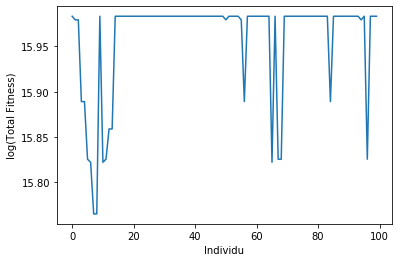

Iterasi ke-50


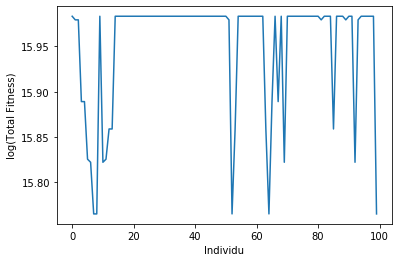

Iterasi ke-75


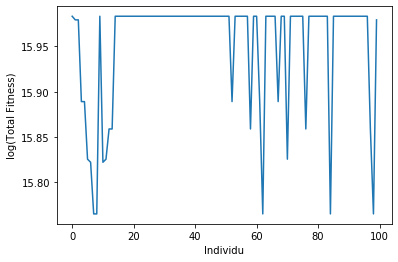

Iterasi ke-100


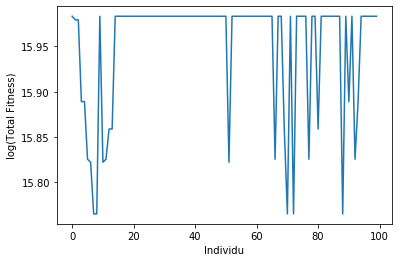

In [26]:
best_gen = []
second_best_gen = []
mean_gen = []
worst_gen = []

best_gen.append([0, populasi[0].fitness])
second_best_gen.append([0, populasi[1].fitness])
mean_gen.append([0, count_mean(populasi)])
worst_gen.append([0, populasi[max_population-1].fitness])

saved_populasi = []

for ppls in range(max_iteration):
    
#     melakukan proses split nilai fitness dari tiap fungsi objektif
    
    split_fitness = []
    len_fitness = len(populasi[0].fitness)
    for i in range(len_fitness):
        split_fitness.append([])
    for p in populasi:
        i = 0
        for f in p.fitness:
            split_fitness[i].append([p.id_individu, f])
            i+=1
            
#     membentuk list parento front dari populasi
    
    list_new_population = []
    new_population = []
    left_count = jum_seleksi_populasi
    idx_parento = 0
    list_parento = create_list_parento(split_fitness)
    
#     menghitung crowding distance dari tiap individu
    
    while (left_count>0):
        obj_temp = crowding_distance(split_fitness, list_parento[idx_parento])
        tot_crowding_distance = [[p, 0] for p in list_parento[idx_parento]]
        for i in range(len(obj_temp)):
            for j in range(len(obj_temp[i])):
                x = 0
                while (tot_crowding_distance[x][0]!=obj_temp[i][j][0]):
                    x+=1
                tot_crowding_distance[x][1]+=obj_temp[i][j][2]
        for t in tot_crowding_distance:
            total_fitness = 0
            for f in populasi[t[0]].fitness:
                total_fitness+=f
            t.append(total_fitness)
        tot_crowding_distance.sort(key=lambda l:[l[1],l[2]], reverse=True)
        for t in tot_crowding_distance:
            if (left_count>0):
                list_new_population.append(t[0])
                left_count-=1
        idx_parento+=1
    
#     memasukkan 50% populasi terbaik berdasarkan parento front dan nilai crowding distancenya
    
    for i in range(len(list_new_population)):
        new_population.append(Individu(i, populasi[list_new_population[i]].genotipe, populasi[list_new_population[i]].fenotipe, populasi[list_new_population[i]].fitness))
    
#     melakukan seleksi turnamen dengan parent diambil random dari 50% individu terbaik tadi
    roulette_wheel = []
    for p in new_population:
        roulette_wheel.append([p.id_individu, sum([f for f in p.fitness])])
    sum_total = sum([r[1] for r in roulette_wheel])
    prob = 0
    for r in roulette_wheel:
        prob+=(r[1]/sum_total)
        r.append(prob)
    
    idx = len(new_population)
    while (idx<max_population):
        r = random.random()
        idx_p1 = 0
        while (roulette_wheel[idx_p1][2]<=r):
            idx_p1+=1
        r = random.random()
        idx_p2 = 0
        while (roulette_wheel[idx_p2][2]<=r):
            idx_p2+=1
        if (idx_p1!=idx_p2):
            parent1 = populasi[idx_p1].genotipe
            parent2 = populasi[idx_p2].genotipe
            child1, child2 = crossover(parent1, parent2)
            child1 = mutasi(child1)
            child2 = mutasi(child2)
            if (len(new_population)<max_population):
                temp_dec_kromosom = decode(parent1)
                temp_fitness = count_fitness(temp_dec_kromosom)
                if (check_constraint(temp_dec_kromosom)):
                    new_population.append(Individu(idx, parent1, temp_dec_kromosom, temp_fitness))
                    idx+=1
            if (len(new_population)<max_population):
                temp_dec_kromosom = decode(parent2)
                temp_fitness = count_fitness(temp_dec_kromosom)
                if (check_constraint(temp_dec_kromosom)):
                    new_population.append(Individu(idx, parent2, temp_dec_kromosom, temp_fitness))
                    idx+=1
    populasi = new_population
    if ((ppls+1)==int(max_iteration*0.25) or (ppls+1)==int(max_iteration*0.5) or (ppls+1)==int(max_iteration*0.75) or (ppls+1)==max_iteration):
        print("Iterasi ke-{}".format(ppls+1))
        plot_fitness_individu(populasi)
    tot_fitness = [[i, sum([f for f in populasi[i].fitness])] for i in range(len(populasi))]
    tot_fitness.sort(key=lambda l:l[1], reverse=True)
    best_gen.append([ppls+1, populasi[tot_fitness[0][0]].fitness])
    second_best_gen.append([ppls+1, populasi[tot_fitness[1][0]].fitness])
    mean_gen.append([ppls+1, count_mean(populasi)])
    worst_gen.append([ppls+1, populasi[tot_fitness[max_population-1][0]].fitness])


In [27]:
for i in range(len(populasi[0].fenotipe)):
    print("Komoditas ke-{}".format(i+1))
    temp = []
    for j in range(len(populasi[0].fenotipe[i])):
        temp.append([j+1, populasi[0].fenotipe[i][j]])
    print(tabulate(temp, headers=['No', 'Nilai Optimal']))
    print("Total: {}".format(sum([f for f in populasi[0].fenotipe[i]])))
    

Komoditas ke-1
  No    Nilai Optimal
----  ---------------
   1       726.034
   2       186.541
   3         4.06202
   4       184.069
   5        79.7694
   6      1111.69
   7        13.9934
   8      4460.56
   9        13.7136
  10        24.0557
  11       200.59
  12       626.128
  13        16.5386
  14        96.2031
  15       245.99
  16       499.1
  17       279.987
  18       312.474
  19        15.8418
  20        12.6048
  21        10.9772
  22        38.9696
  23         1.94408
  24         0
  25         0
  26         0
  27         0.580149
Total: 9162.41838603345
Komoditas ke-2
  No    Nilai Optimal
----  ---------------
   1      1497.16
   2       247.259
   3        11.1706
   4       296.59
   5       200.123
   6      2448.39
   7       446.39
   8      8067.39
   9        31.5773
  10         4.51044
  11       113.12
  12       939.682
  13         8.72873
  14        91.5854
  15       364.54
  16       714.23
  17       433.012
  18      1156.9
  19   

In [44]:
populasi[0].fenotipe

[[1025.0836283726042,
  338.96227566841657,
  1.8976925894274204,
  259.95287510682454,
  75.03039921865462,
  1283.675741667684,
  15.875961421071908,
  4329.542790868026,
  99.98486143328043,
  18.76400927847638,
  273.498351849591,
  396.22524722256134,
  1.6085947991698204,
  34.00073251129288,
  77.5788060065926,
  826.2397753632035,
  184.77414235136123,
  270.40092784763766,
  12.926382615065314,
  6.06910023196191,
  1.4745452325723354,
  0.22952020510316198,
  2.604321816628006,
  0.0,
  0.0,
  0.0,
  4.5278964717372725],
 [2113.825418141863,
  449.29117323892075,
  5.218654620925405,
  418.86094493956784,
  188.23415944329142,
  2827.1659138078376,
  506.44316933219386,
  7830.432792088878,
  230.22829935294834,
  3.5182517397143207,
  154.23513612501526,
  594.6479062385545,
  0.8489805884507385,
  32.36869735075082,
  114.96618239531192,
  1182.377609571481,
  285.7618117445977,
  1001.1331949700891,
  3.877914784519595,
  2.3342693199853497,
  0.40214869979245516,
  0.1147

### Grafik dan Tabel

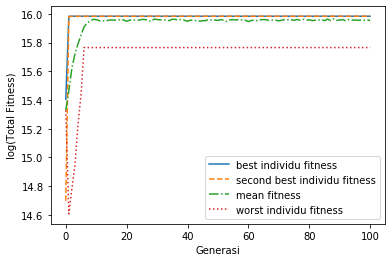

In [154]:
grafik_fitness(best_gen, second_best_gen, mean_gen, worst_gen)

### Visualisasi ke Peta

In [6]:
import numpy as np
import pandas as pd
import shapefile as shp
import seaborn as sns
from matplotlib import pyplot as mplt
from matplotlib.patches import Patch

In [7]:
shp_path = './resource/PROVINSI_JAWA_BARAT.shp'
sf = shp.Reader(shp_path)

In [8]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [9]:
df = read_shapefile(sf)

In [10]:
def plot_map(kabkota, warna, title, legend):
    global df
    global sf
    mplt.figure(figsize=(20, 18))
    mplt.legend(handles=legend, loc='right')
    mplt.title(title, fontsize=20)
    for i in range(len(kabkota)):
        com_id = df[df.KABKOT==kabkota[i]].index.to_numpy()[0]
        shape_ex = sf.shape(com_id)
        x = [i[0] for i in shape_ex.points[:]]
        y = [i[1] for i in shape_ex.points[:]]
        mplt.plot(x, y, 'k')
        length = len(x)
        x0 = np.mean(x)
        y0 = np.mean(y)
        mplt.text(x0, y0, kabkota[i], fontsize=15)
        mplt.fill(x, y, color=warna[i])

In [152]:
def plot_map_daerah(kabkota, title, komoditas, label):
    global df
    global sf
    mplt.figure(figsize=(20, 18))
#     mplt.legend(handles=legend, loc='right')
    mplt.title(title, fontsize=20)
    for i in range(len(kabkota)):
        com_id = df[df.KABKOT==kabkota[i]].index.to_numpy()[0]
        shape_ex = sf.shape(com_id)
        x = [i[0] for i in shape_ex.points[:]]
        y = [i[1] for i in shape_ex.points[:]]
        mplt.plot(x, y, 'k')
        length = len(x)
        x0 = np.mean(x)
        y0 = np.mean(y)
        props = dict(boxstyle='round', facecolor='white')
        mplt.text(x0, y0, kabkota[i], fontsize=15)
        if (komoditas[0]>0):
            mplt.text(x0+0.05, y0+0.05, label[0] + ' = ' + str(komoditas[0]) + ' Ha', fontsize=15, bbox=props)
        if (komoditas[1]>0):
            mplt.text(x0-0.05*3, y0-0.05, label[1] + ' = ' + str(komoditas[1]) + ' Ha', fontsize=15, bbox=props)
        if (komoditas[2]>0):
            mplt.text(x0+0.07, y0+0.07, label[2] + ' = ' + str(komoditas[2]) + ' Ha', fontsize=15, bbox=props)
        if (komoditas[3]>0):
            mplt.text(x0-0.07*3, y0-0.07, label[3] + ' = ' + str(komoditas[3]) + ' Ha', fontsize=15, bbox=props)
        if (komoditas[4]>0):
            mplt.text(x0+0.09, y0+0.09, label[4] + ' = ' + str(komoditas[4]) + ' Ha', fontsize=15, bbox=props)
        if (komoditas[5]>0):
            mplt.text(x0-0.09*3, y0-0.09, label[5] + ' = ' + str(komoditas[5]) + ' Ha', fontsize=15, bbox=props)
        if (komoditas[6]>0):
            mplt.text(x0+0.11, y0+0.11, label[6] + ' = ' + str(komoditas[6]) + ' Ha', fontsize=15, bbox=props)
        if (komoditas[7]>0):
            mplt.text(x0-0.11*3, y0-0.11, label[7] + ' = ' + str(komoditas[7]) + ' Ha', fontsize=15, bbox=props)
        if (komoditas[8]>0):
            mplt.text(x0+0.13, y0+0.13, label[8] + ' = ' + str(komoditas[8]) + ' Ha', fontsize=15, bbox=props)

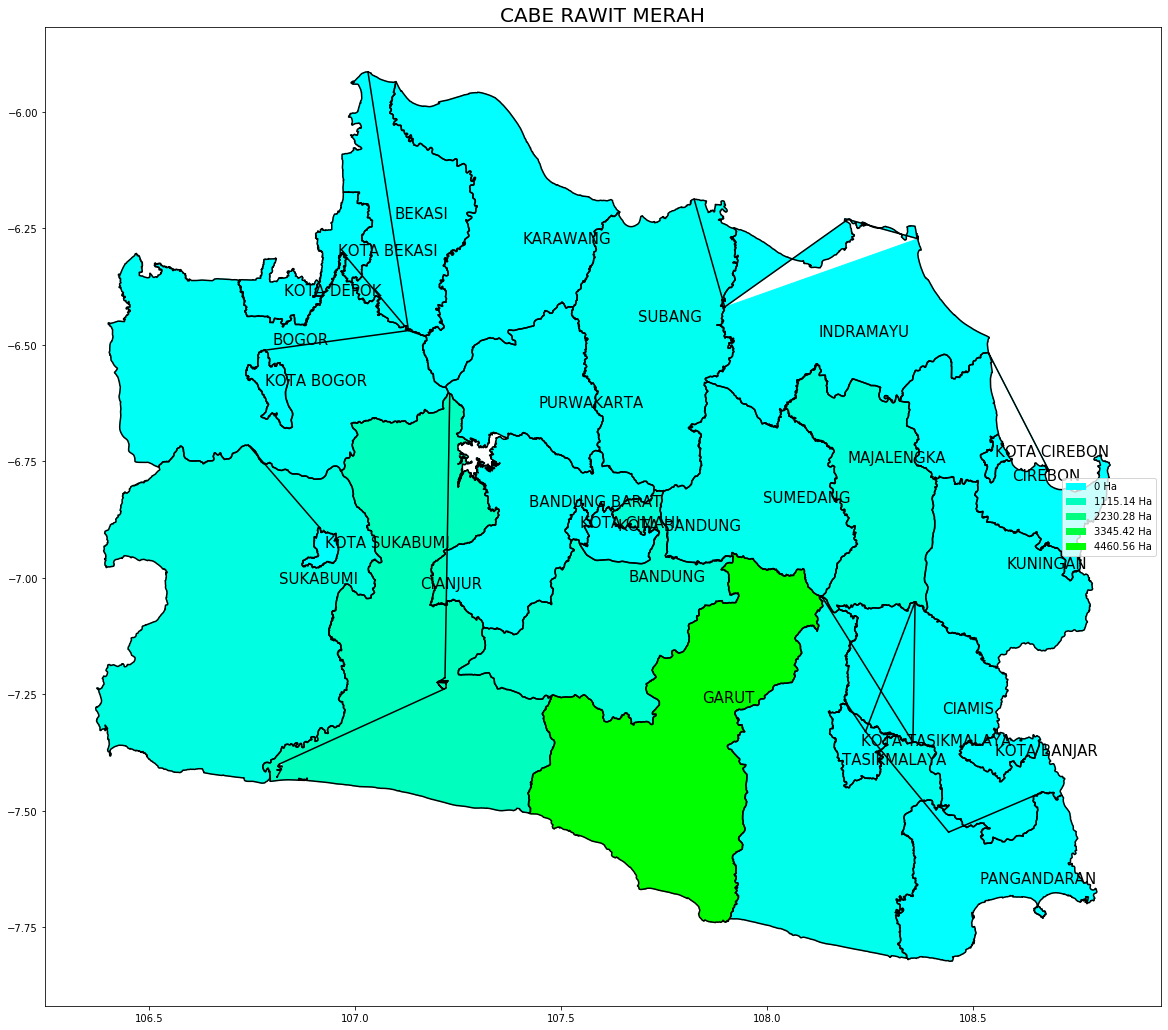

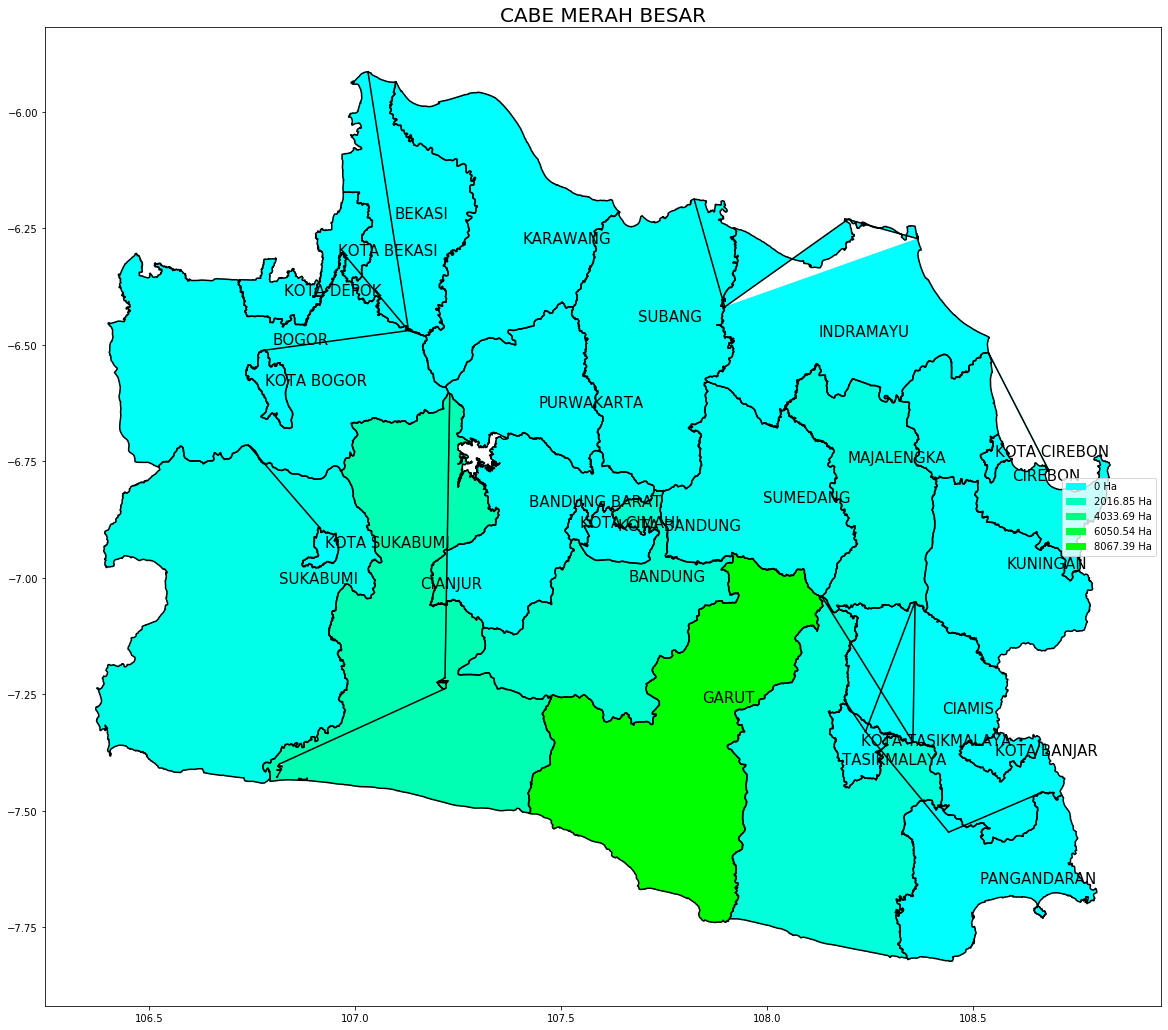

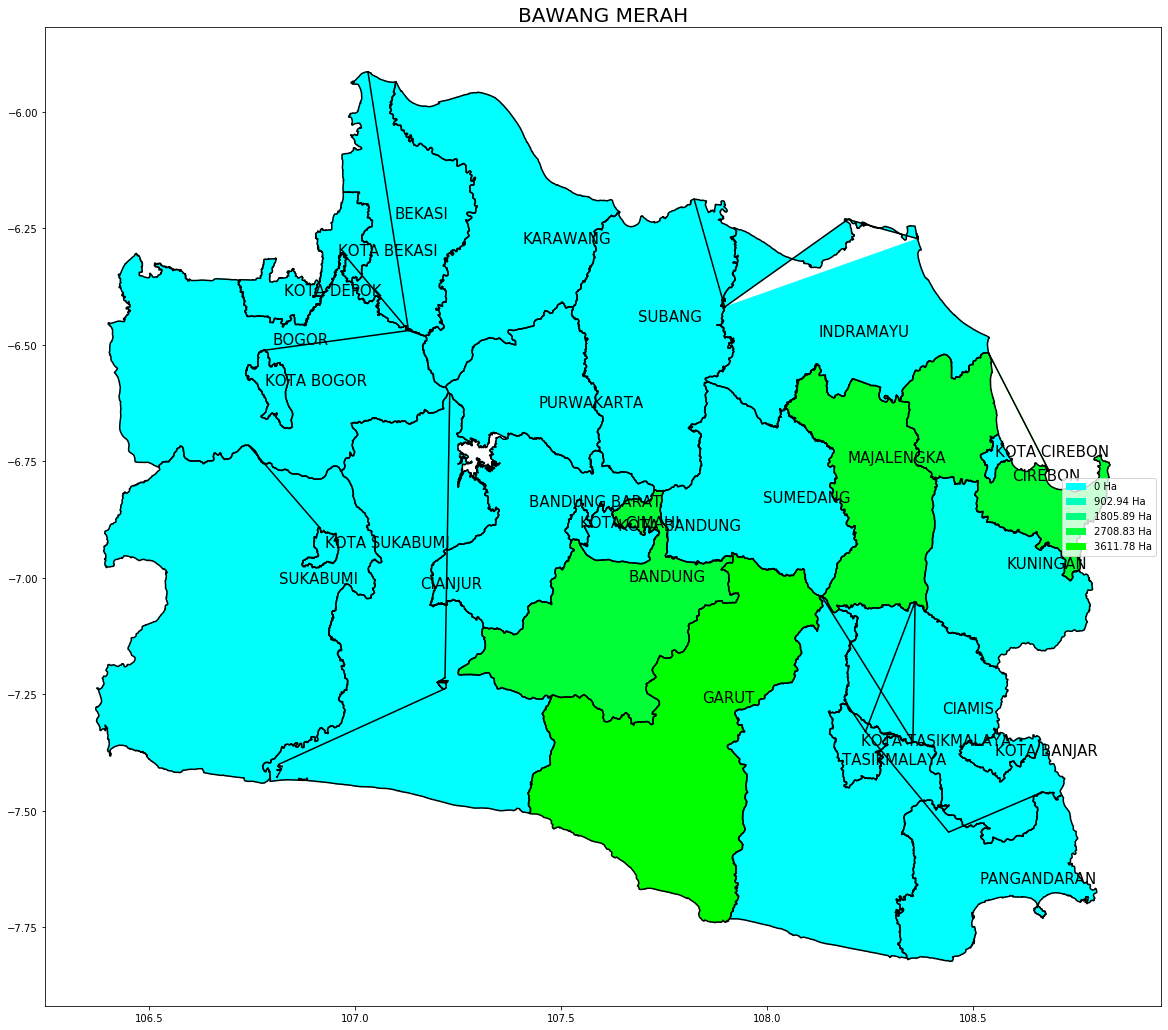

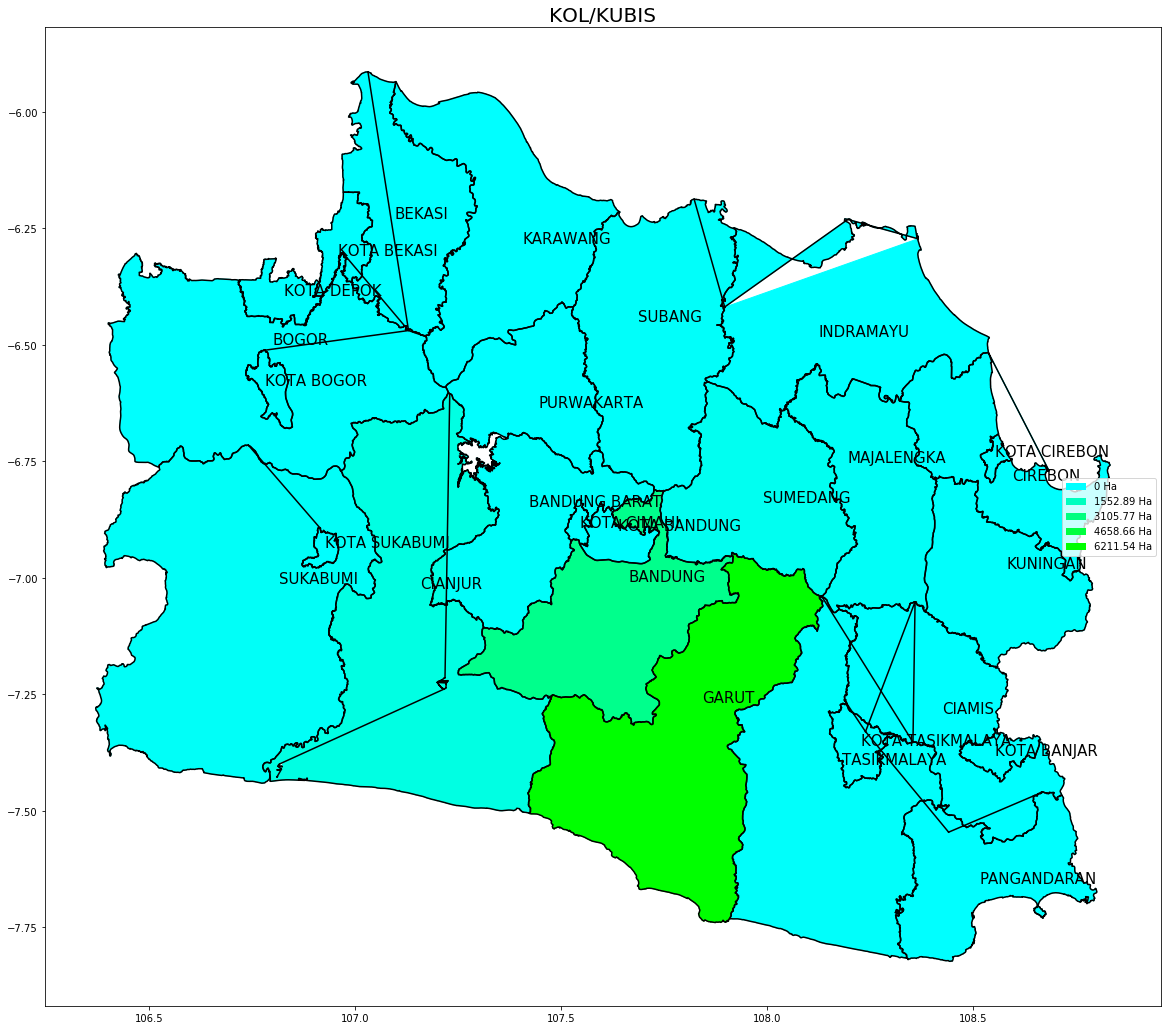

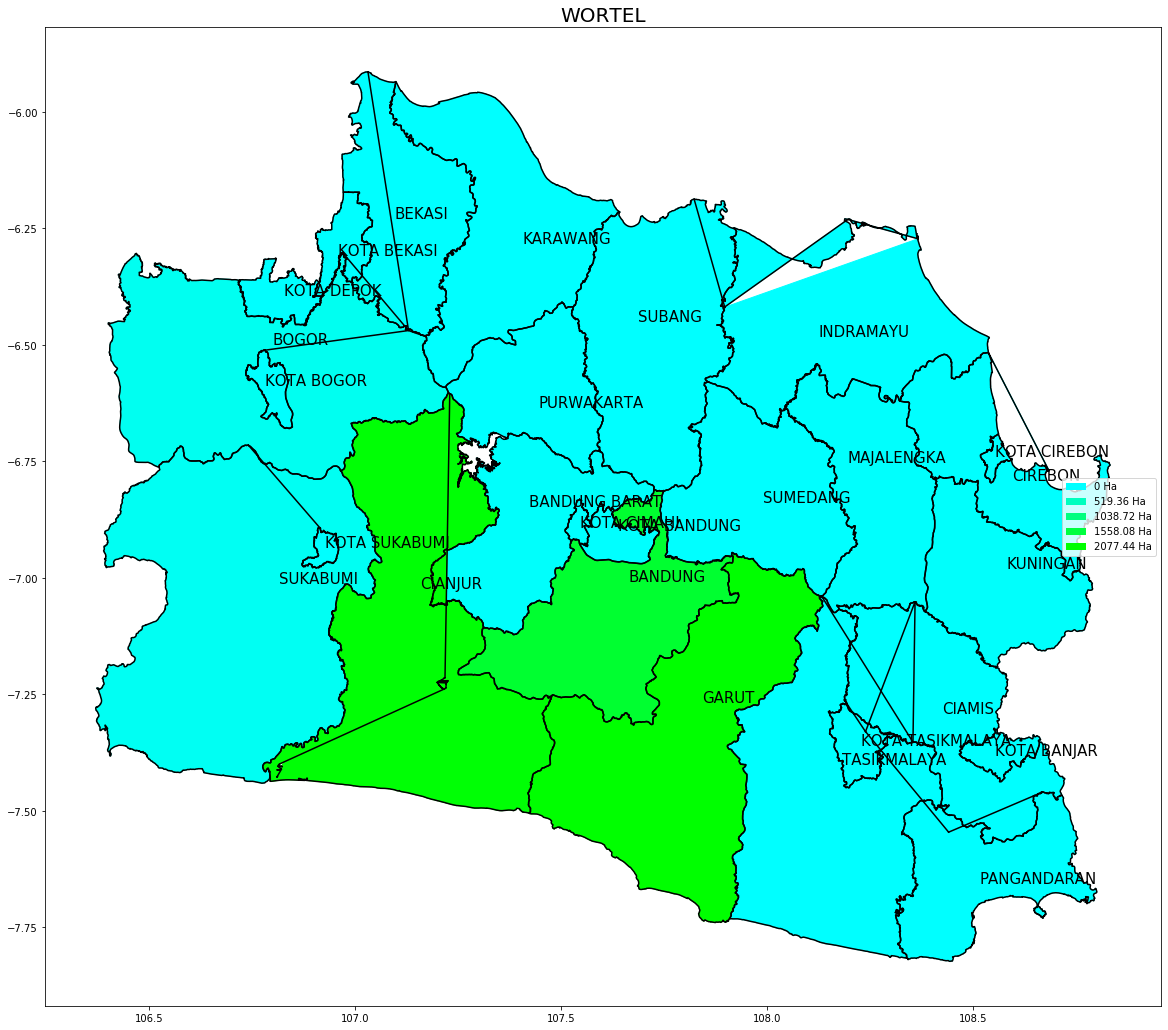

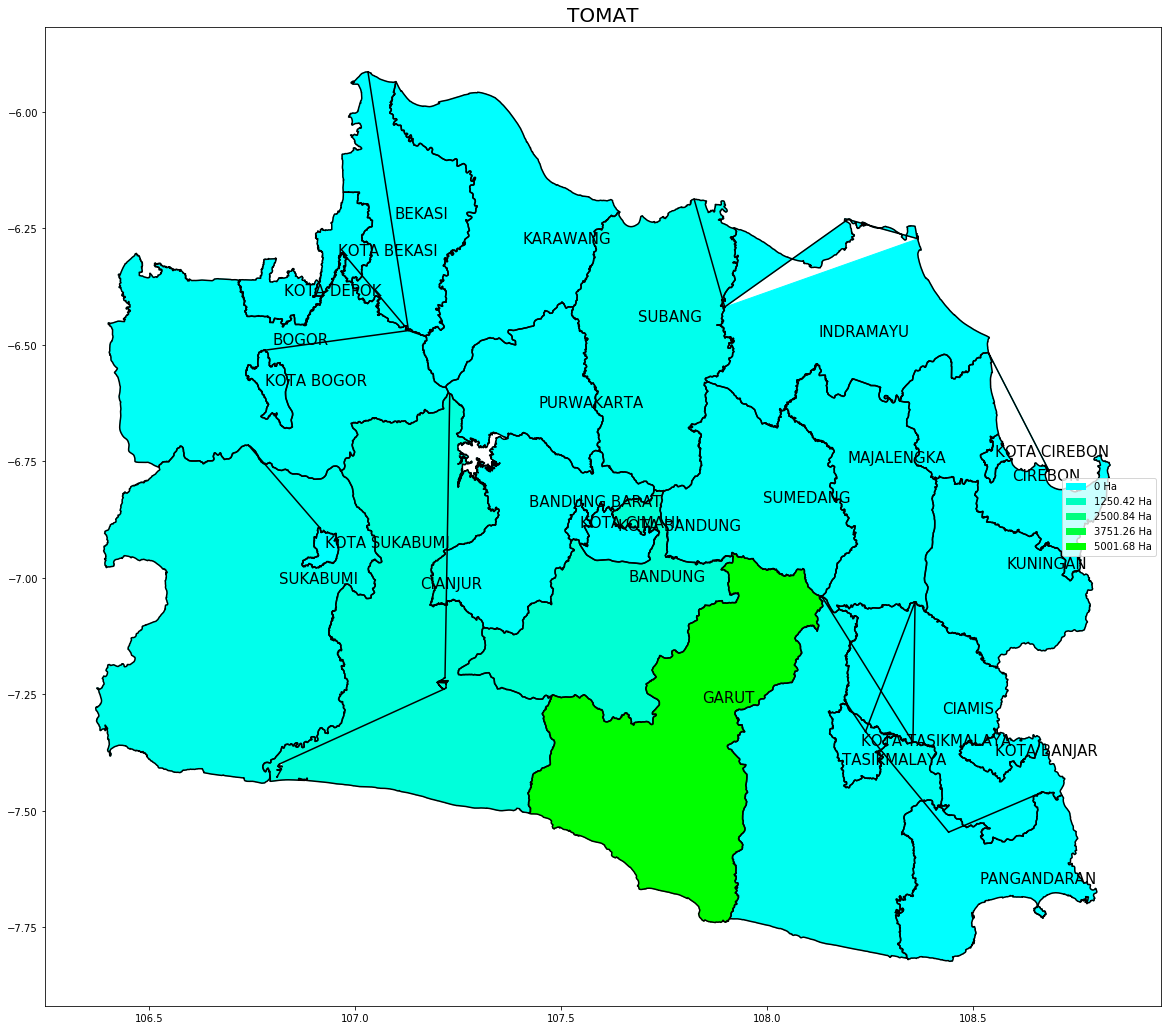

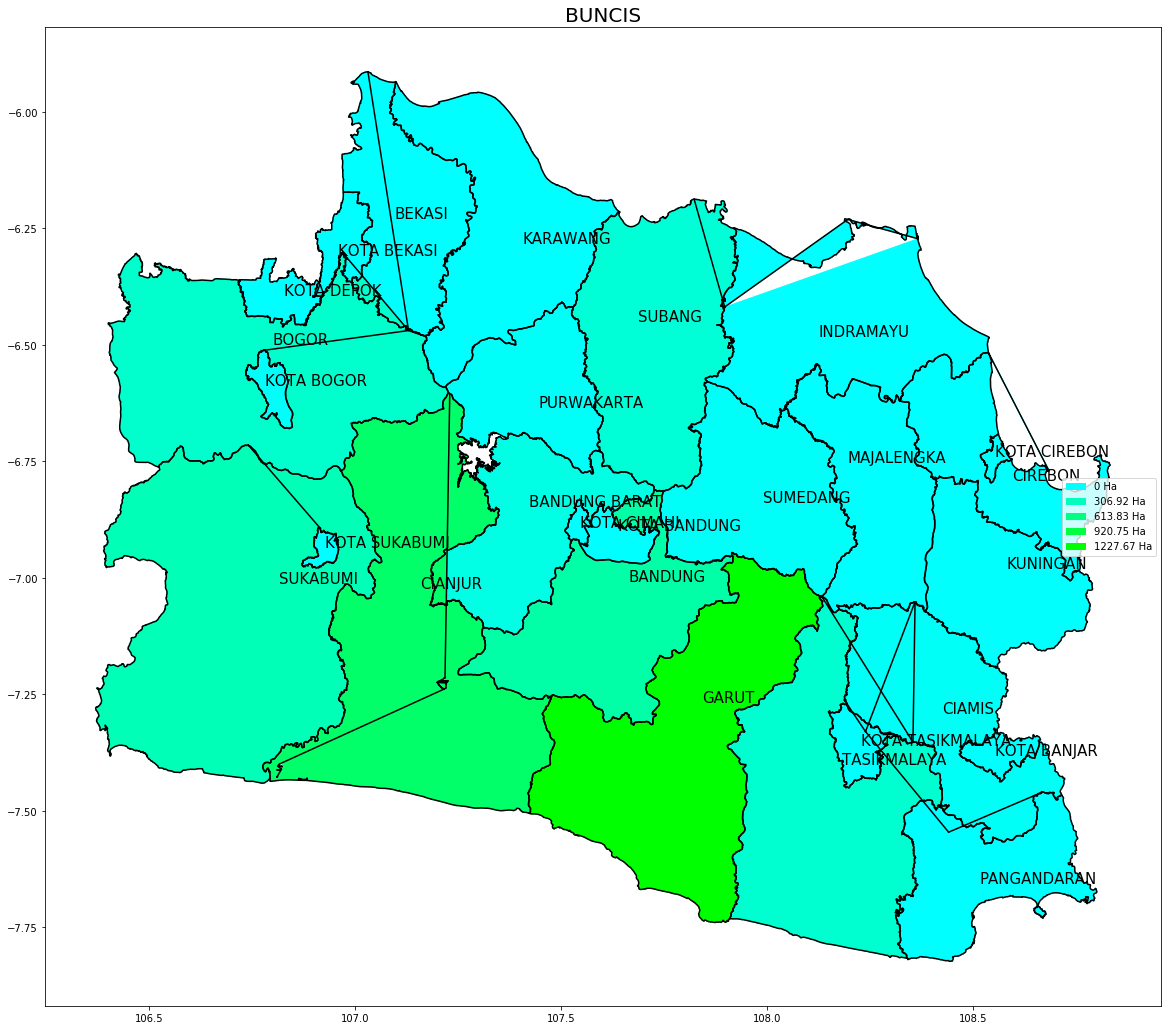

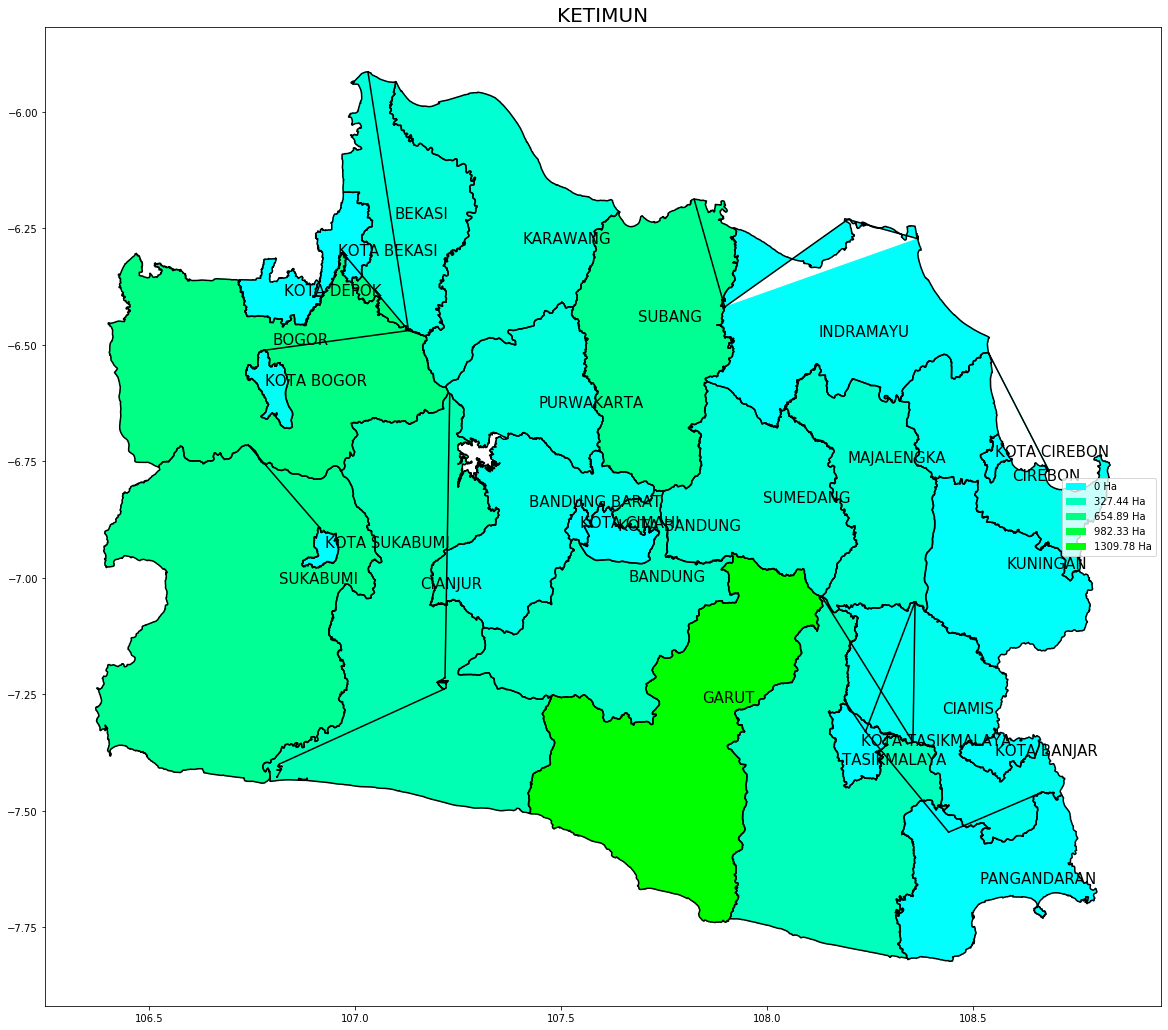

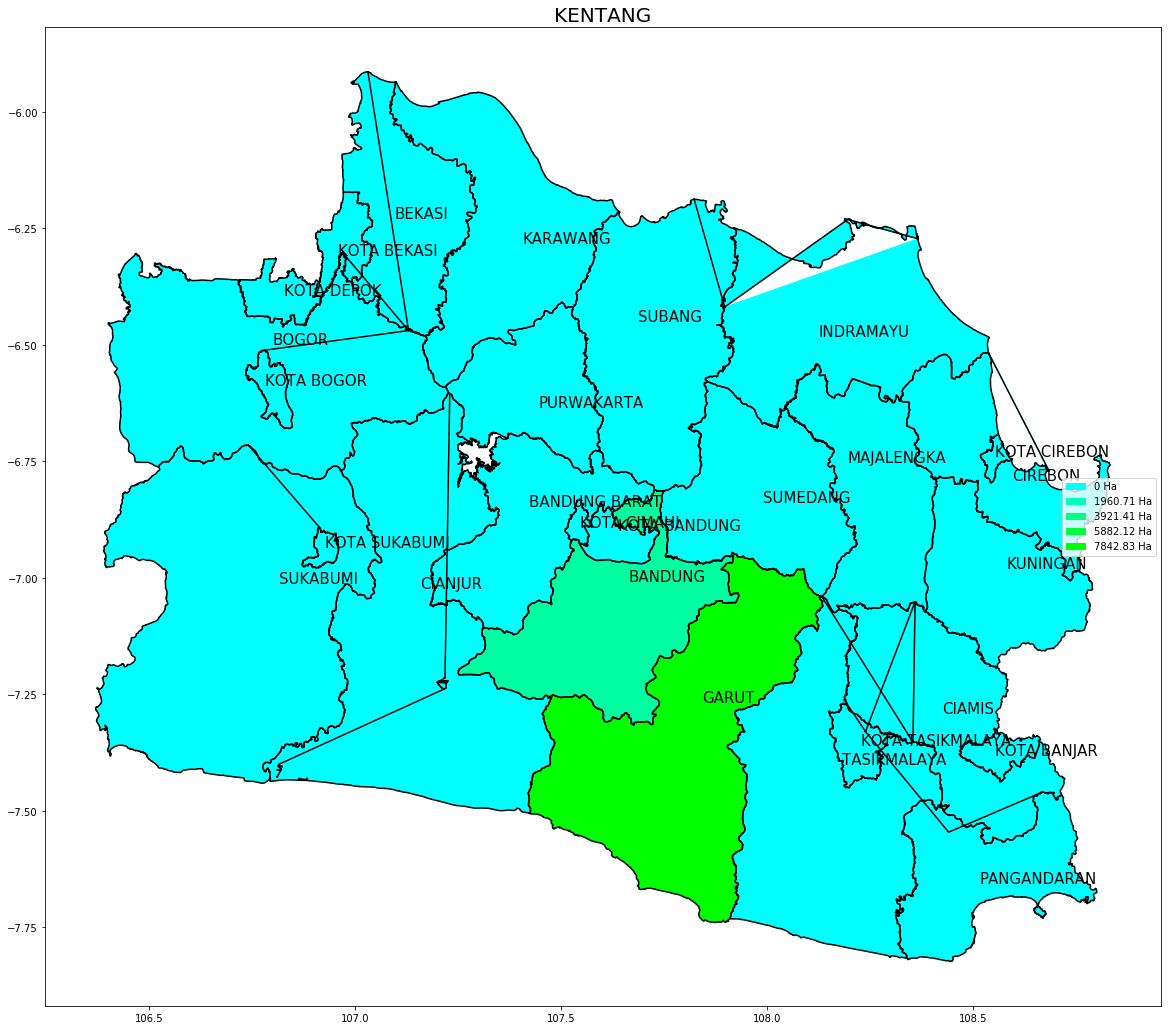

In [59]:
kabkota = ['BANDUNG', 'BANDUNG BARAT', 'BEKASI', 'BOGOR', 'CIAMIS', 'CIANJUR', 'CIREBON', 'GARUT', 'INDRAMAYU', 'KARAWANG', 'KUNINGAN', 'MAJALENGKA', 'PANGANDARAN', 'PURWAKARTA', 'SUBANG', 'SUKABUMI', 'SUMEDANG', 'TASIKMALAYA', 'KOTA BANDUNG', 'KOTA BANJAR', 'KOTA BEKASI', 'KOTA BOGOR', 'KOTA CIMAHI', 'KOTA CIREBON', 'KOTA DEPOK', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA']
komoditas_label = ['CABE RAWIT MERAH', 'CABE MERAH BESAR' ,'BAWANG MERAH', 'KOL/KUBIS', 'WORTEL', 'TOMAT', 'BUNCIS', 'KETIMUN', 'KENTANG']
# legend = [Patch(facecolor=(0, 1, 1), label='0%'), Patch(facecolor=(0, 1, 0.75), label='25%'), Patch(facecolor=(0, 1, 0.5), label='50%'), Patch(facecolor=(0, 1, 0.25), label='75%'), Patch(facecolor=(0, 1, 0), label='100%')]

for i in range(len(komoditas_label)):
    maks_luas = max(populasi[0].fenotipe[i])
    legend = [Patch(facecolor=(0, 1, 1), label='0 Ha'), Patch(facecolor=(0, 1, 0.75), label="{} Ha".format(round(0.25*maks_luas, 2))), Patch(facecolor=(0, 1, 0.5), label="{} Ha".format(round(0.5*maks_luas, 2))), Patch(facecolor=(0, 1, 0.25), label="{} Ha".format(round(0.75*maks_luas, 2))), Patch(facecolor=(0, 1, 0), label="{} Ha".format(round(maks_luas, 2)))]
    warna = [(0, 1, 1-(f/maks_luas)) for f in populasi[0].fenotipe[i]]
    plot_map(kabkota, warna, komoditas_label[i], legend)

In [186]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=[[populasi[0].fenotipe[j][i] for j in range(komoditas_total)] for i in range(daerah_total)],
                   x=['CABE RAWIT MERAH', 'CABE MERAH BESAR' ,'BAWANG MERAH', 'KOL/KUBIS', 'WORTEL', 'TOMAT', 'BUNCIS', 'KETIMUN', 'KENTANG'],
                   y=['BANDUNG', 'BANDUNG BARAT', 'BEKASI', 'BOGOR', 'CIAMIS', 'CIANJUR', 'CIREBON', 'GARUT', 'INDRAMAYU', 'KARAWANG', 'KUNINGAN', 'MAJALENGKA', 'PANGANDARAN', 'PURWAKARTA', 'SUBANG', 'SUKABUMI', 'SUMEDANG', 'TASIKMALAYA', 'KOTA BANDUNG', 'KOTA BANJAR', 'KOTA BEKASI', 'KOTA BOGOR', 'KOTA CIMAHI', 'KOTA CIREBON', 'KOTA DEPOK', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA']))
fig.update_yaxes(tickfont=dict(size=8))
fig.show()

### Simpan Data Best Fitness Sebagai Backup

In [159]:
import csv

with open('data_best_fitness.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for f in populasi[0].fenotipe:
        employee_writer.writerow(f)

In [160]:
import csv

with open('data_all_fitness.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for p in populasi:
        for f in p.fenotipe:
            employee_writer.writerow(f)

### Visualisasi Data Backup

In [1]:
import csv

data_backup = []

with open('data_best_fitness.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        data_backup.append([float(r) for r in row])
print(data_backup)

[[726.034061775119, 186.54132584544013, 4.062019289464046, 184.06897814674642, 79.76938102795751, 1111.693810279575, 13.993407398364058, 4460.557563179099, 13.713588084482968, 24.055670858259067, 200.59028201684777, 626.1279453058235, 16.53863997069955, 96.2031497985594, 245.99047735319252, 499.10023196190946, 279.9866927115126, 312.4735685508485, 15.841777560737395, 12.60481015748993, 10.977170064705163, 38.96960078134538, 1.9440849713099744, 0.0, 0.0, 0.0, 0.5801489439628861], [1497.1551703088755, 247.25869857160296, 11.170553046026125, 296.5895495055549, 200.12318398241973, 2448.3931143938466, 446.3896960078134, 8067.386765962642, 31.577340984006835, 4.510438285923574, 113.11976559638627, 939.6818459284581, 8.728726651202539, 91.58539860822854, 364.5401049932853, 714.2296422903186, 433.012452691979, 1156.9030643389085, 4.752533268221219, 4.848003906726895, 2.9937736540104996, 19.48480039067269, 0.4860212428274936, 0.0, 0.0, 1.002075448663167, 2.284336466853864], [2836.50567696252, 3

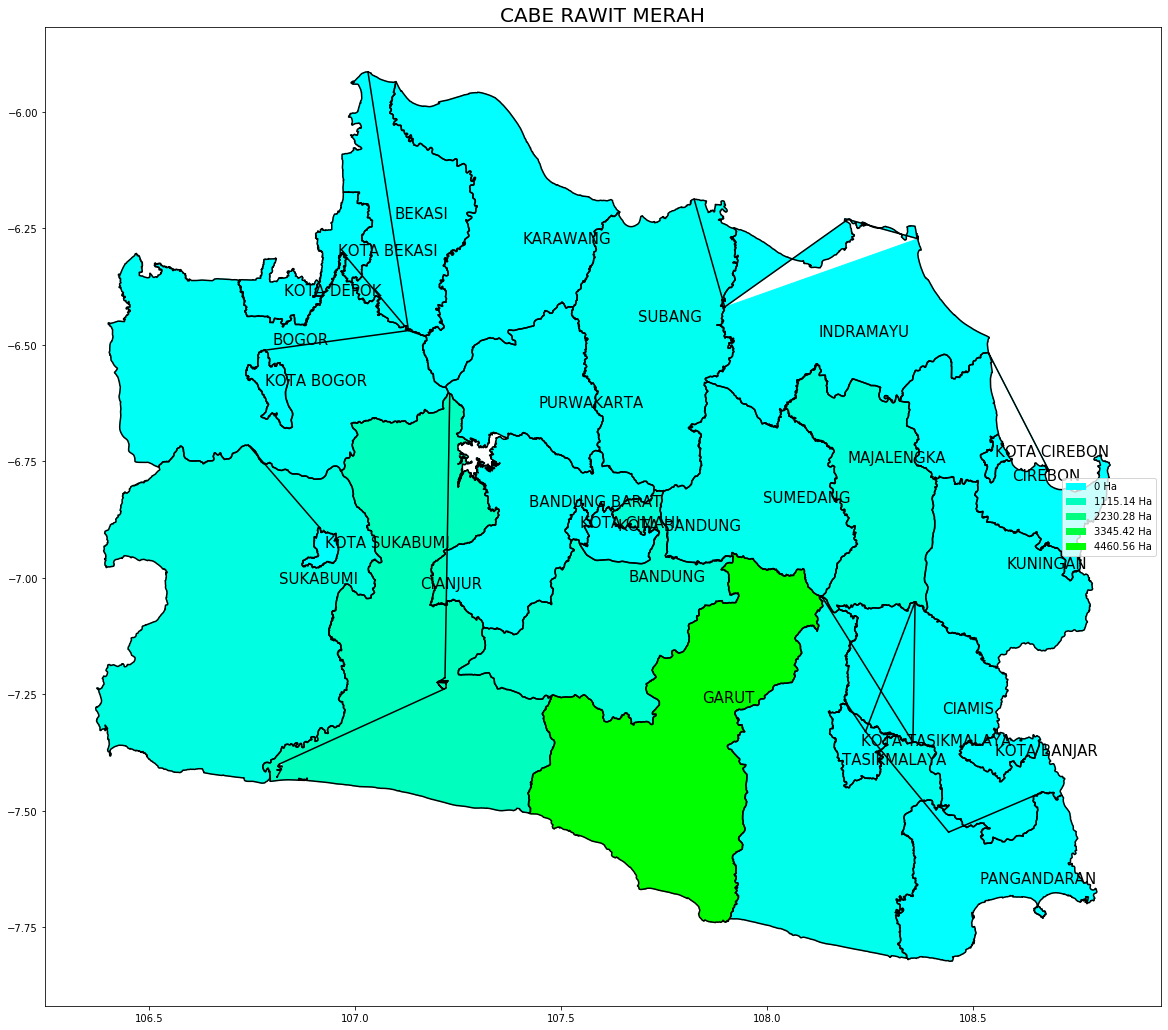

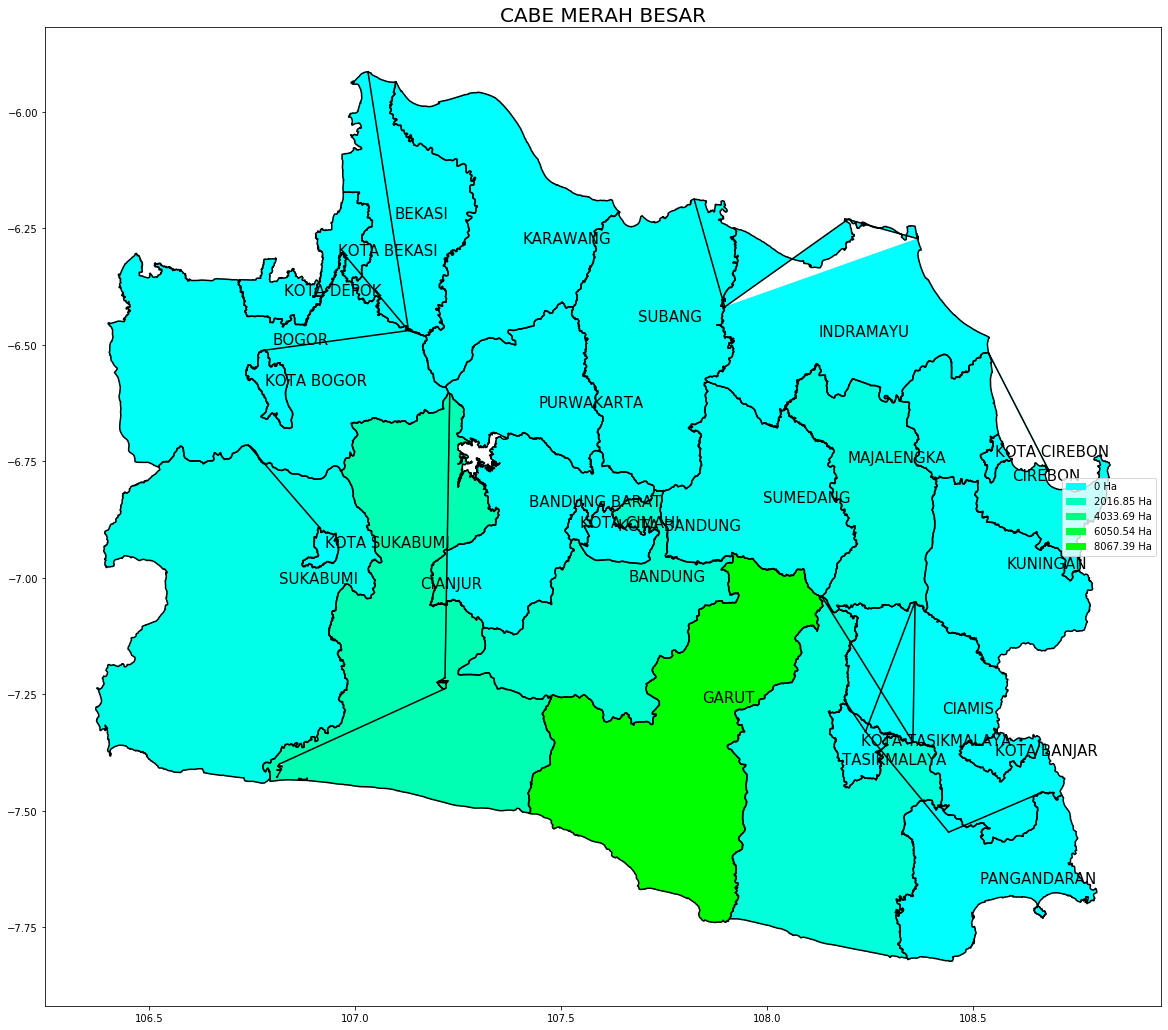

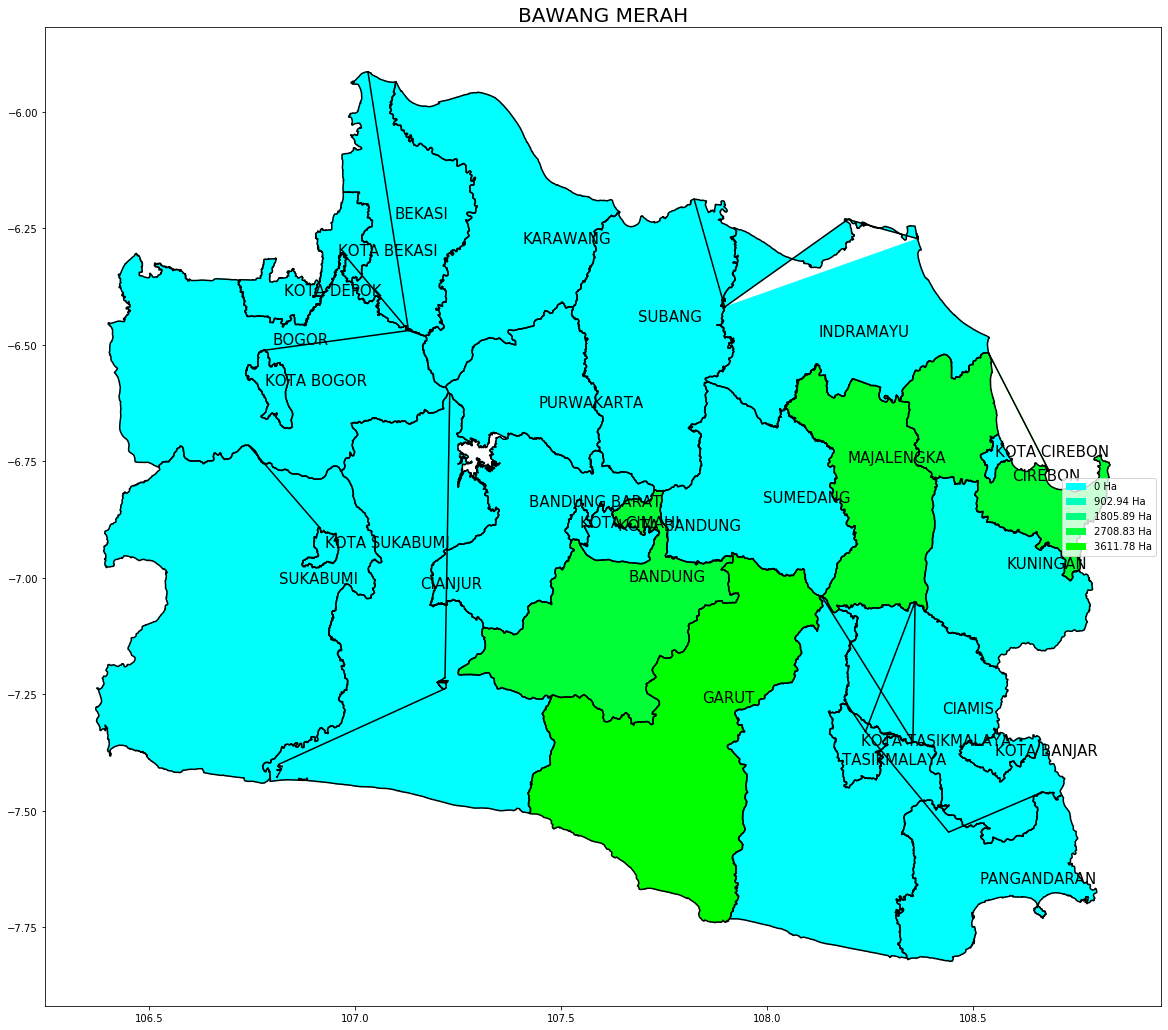

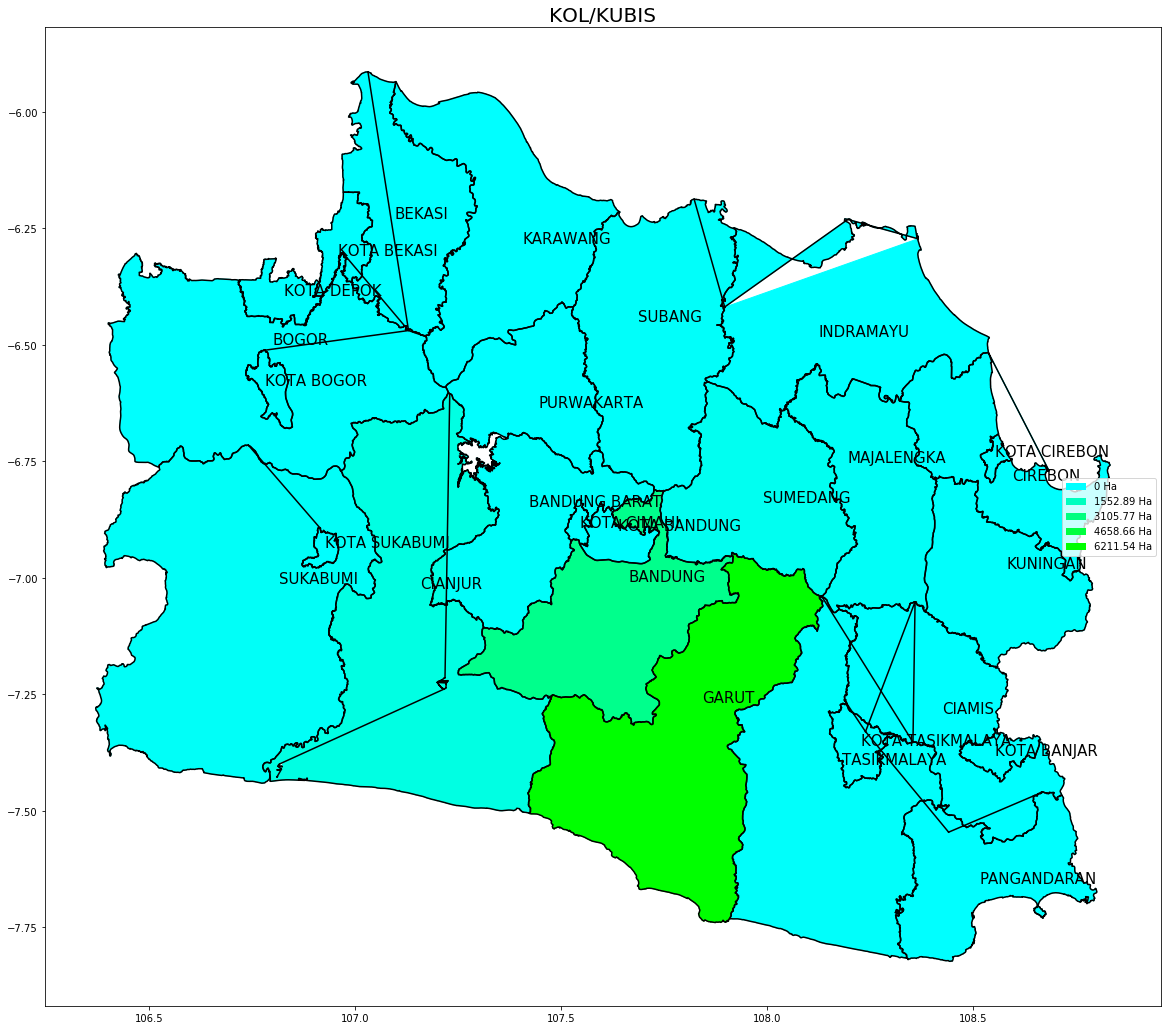

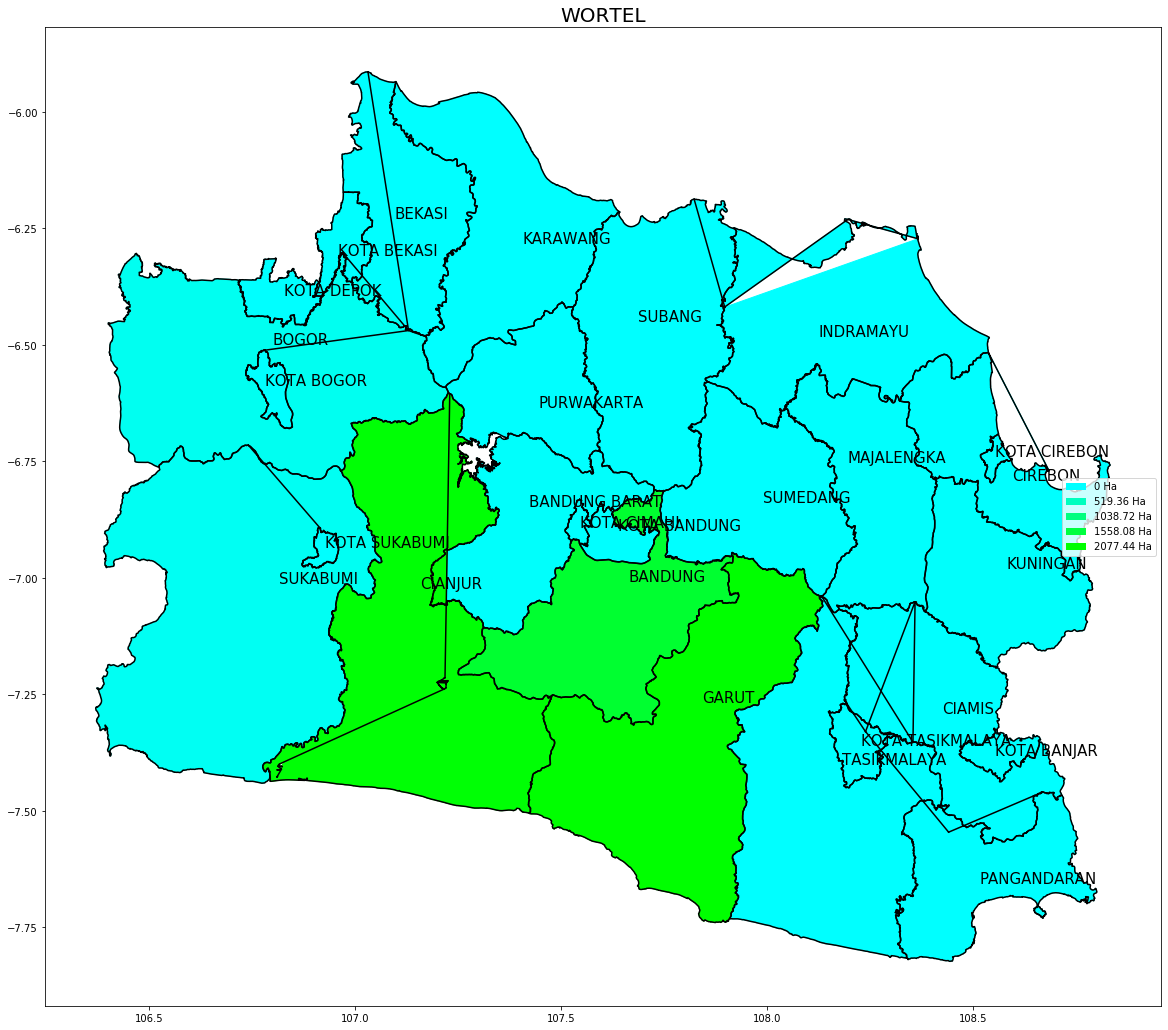

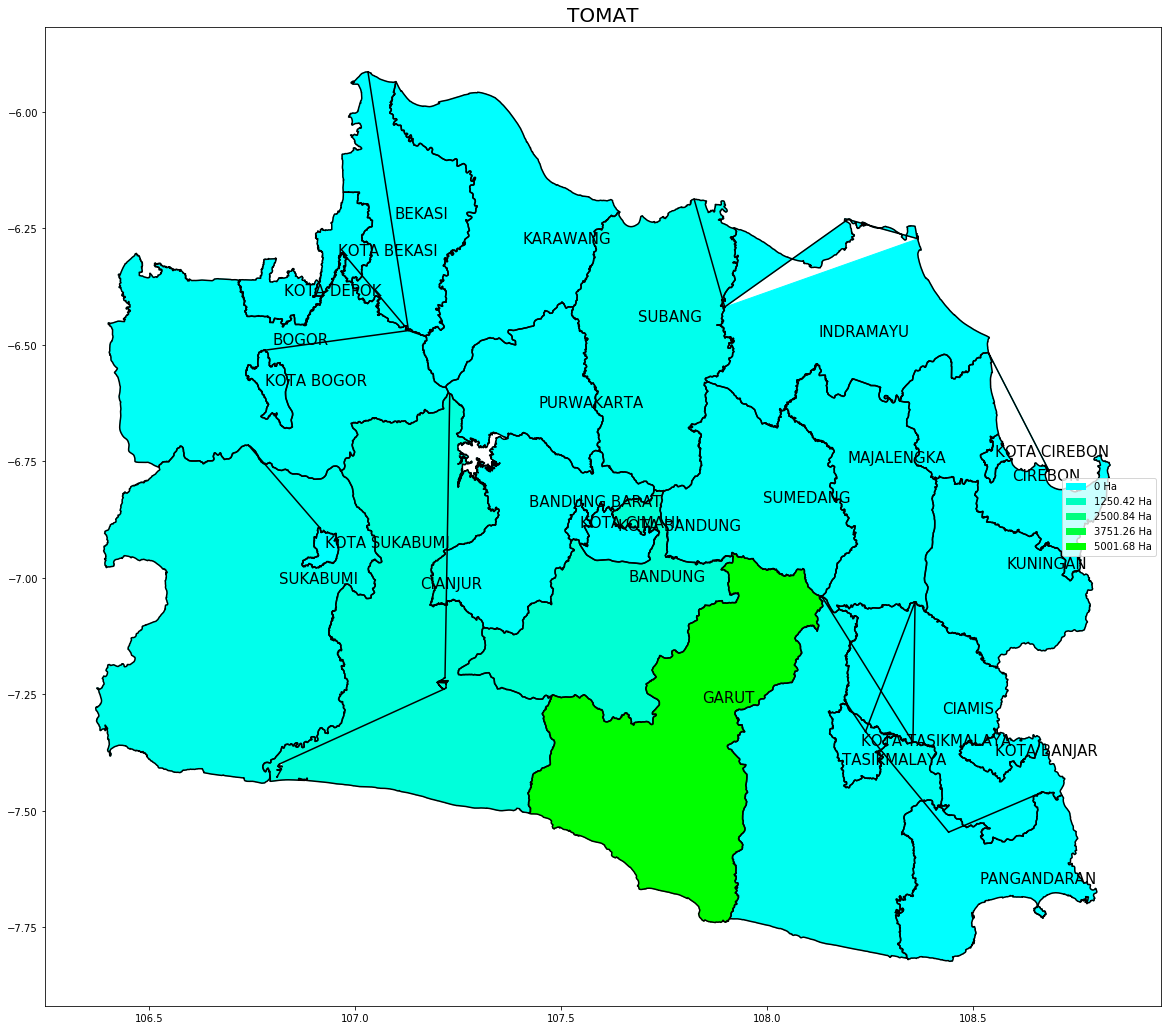

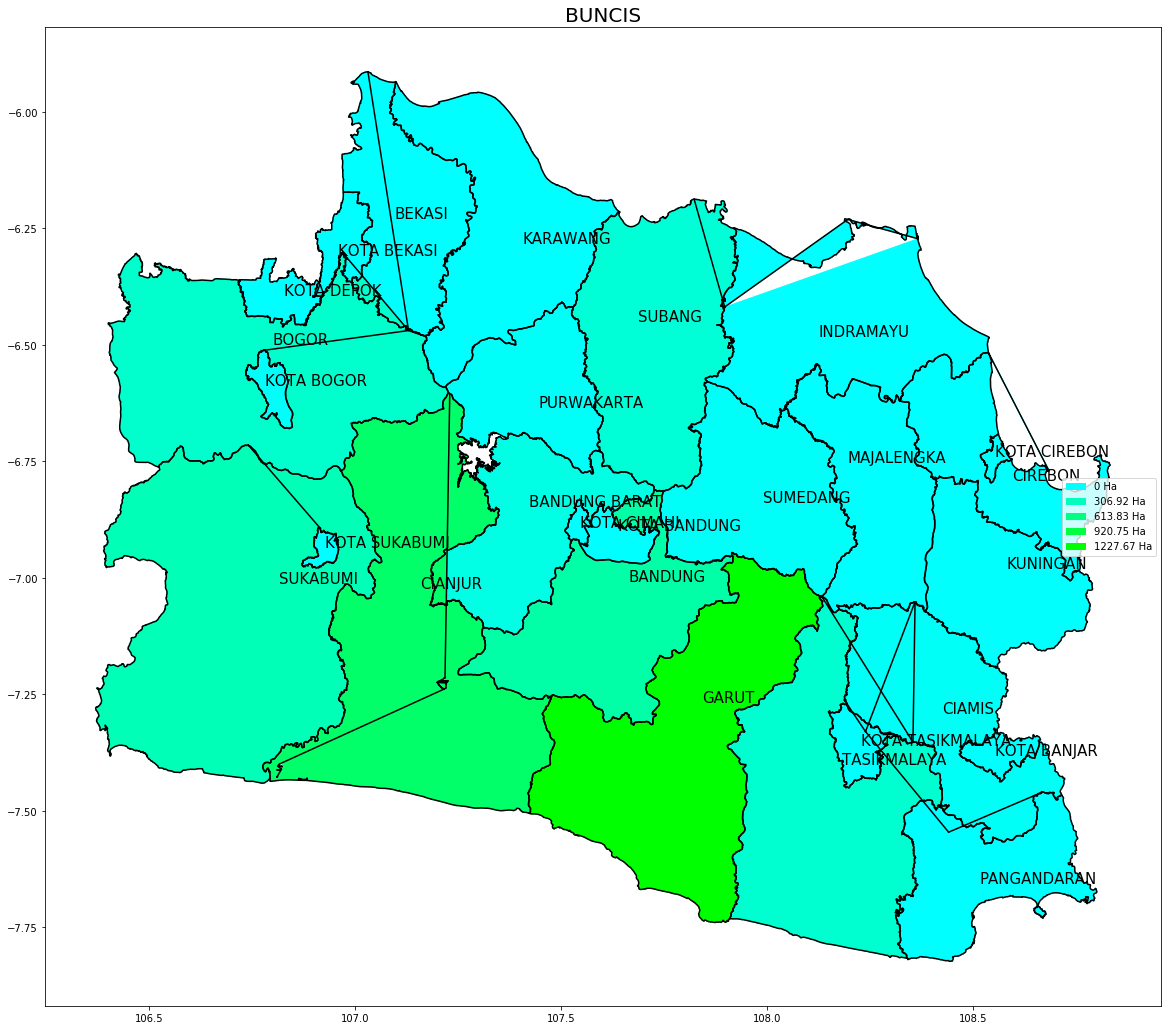

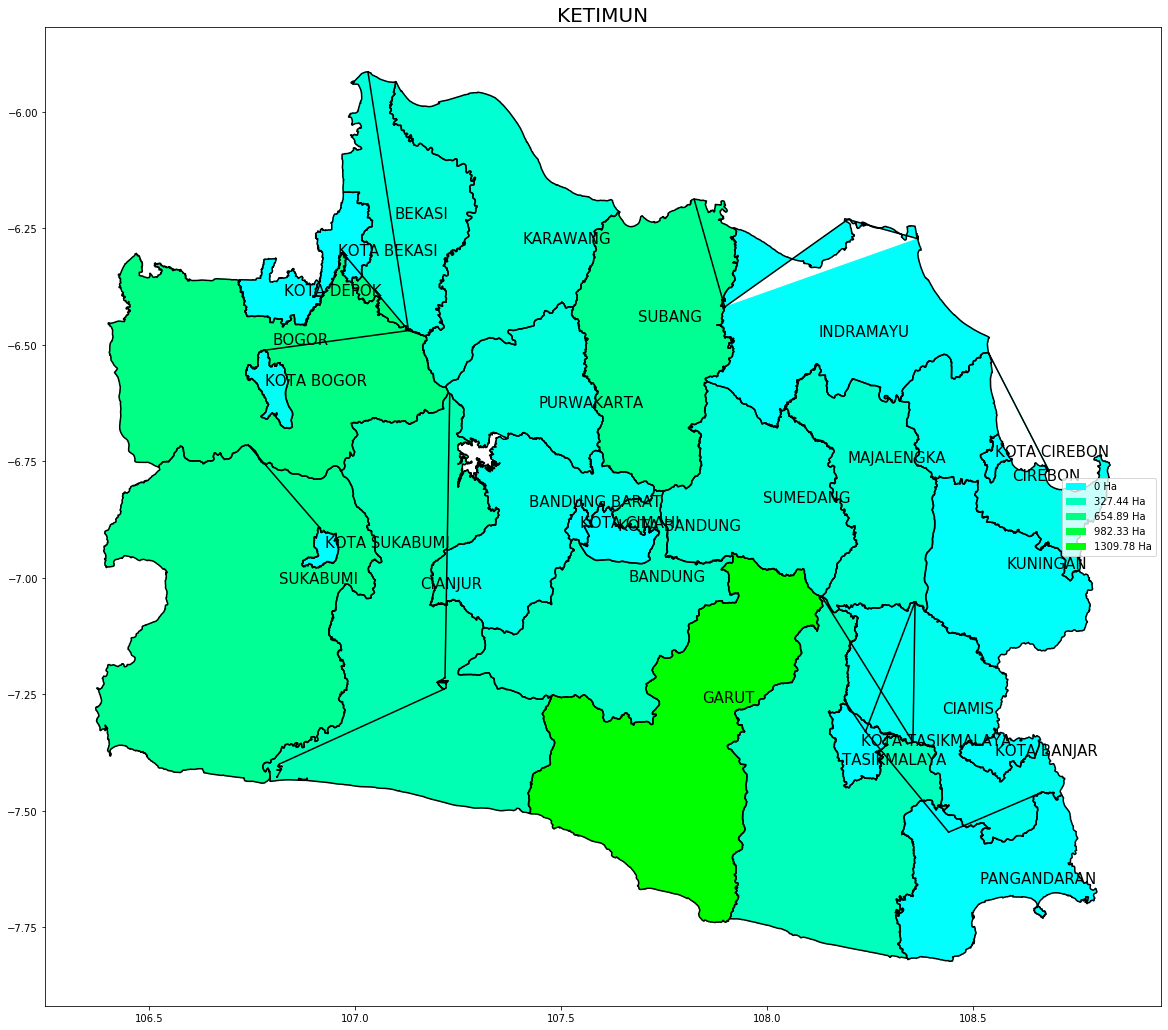

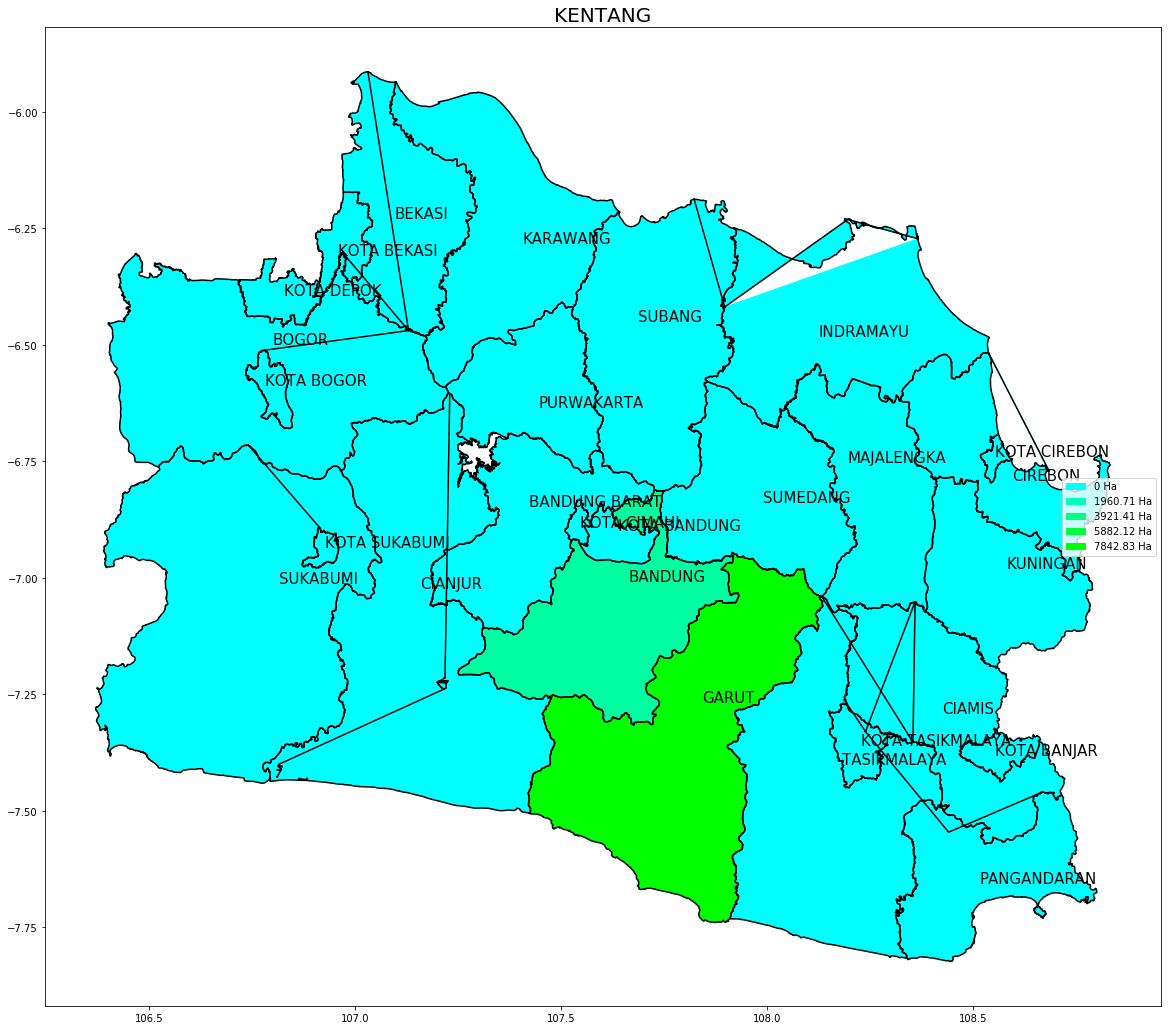

In [11]:
kabkota = ['BANDUNG', 'BANDUNG BARAT', 'BEKASI', 'BOGOR', 'CIAMIS', 'CIANJUR', 'CIREBON', 'GARUT', 'INDRAMAYU', 'KARAWANG', 'KUNINGAN', 'MAJALENGKA', 'PANGANDARAN', 'PURWAKARTA', 'SUBANG', 'SUKABUMI', 'SUMEDANG', 'TASIKMALAYA', 'KOTA BANDUNG', 'KOTA BANJAR', 'KOTA BEKASI', 'KOTA BOGOR', 'KOTA CIMAHI', 'KOTA CIREBON', 'KOTA DEPOK', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA']
komoditas_label = ['CABE RAWIT MERAH', 'CABE MERAH BESAR' ,'BAWANG MERAH', 'KOL/KUBIS', 'WORTEL', 'TOMAT', 'BUNCIS', 'KETIMUN', 'KENTANG']
# legend = [Patch(facecolor=(0, 1, 1), label='0%'), Patch(facecolor=(0, 1, 0.75), label='25%'), Patch(facecolor=(0, 1, 0.5), label='50%'), Patch(facecolor=(0, 1, 0.25), label='75%'), Patch(facecolor=(0, 1, 0), label='100%')]

for i in range(len(komoditas_label)):
    maks_luas = max(data_backup[i])
    legend = [Patch(facecolor=(0, 1, 1), label='0 Ha'), Patch(facecolor=(0, 1, 0.75), label="{} Ha".format(round(0.25*maks_luas, 2))), Patch(facecolor=(0, 1, 0.5), label="{} Ha".format(round(0.5*maks_luas, 2))), Patch(facecolor=(0, 1, 0.25), label="{} Ha".format(round(0.75*maks_luas, 2))), Patch(facecolor=(0, 1, 0), label="{} Ha".format(round(maks_luas, 2)))]
    warna = [(0, 1, 1-(f/maks_luas)) for f in data_backup[i]]
    plot_map(kabkota, warna, komoditas_label[i], legend)

In [33]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=[[data_backup[j][i] for j in range(komoditas_total)] for i in range(daerah_total)],
                   x=['CABE RAWIT MERAH', 'CABE MERAH BESAR' ,'BAWANG MERAH', 'KOL/KUBIS', 'WORTEL', 'TOMAT', 'BUNCIS', 'KETIMUN', 'KENTANG'],
                   y=['BANDUNG', 'BANDUNG BARAT', 'BEKASI', 'BOGOR', 'CIAMIS', 'CIANJUR', 'CIREBON', 'GARUT', 'INDRAMAYU', 'KARAWANG', 'KUNINGAN', 'MAJALENGKA', 'PANGANDARAN', 'PURWAKARTA', 'SUBANG', 'SUKABUMI', 'SUMEDANG', 'TASIKMALAYA', 'KOTA BANDUNG', 'KOTA BANJAR', 'KOTA BEKASI', 'KOTA BOGOR', 'KOTA CIMAHI', 'KOTA CIREBON', 'KOTA DEPOK', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA'],
#                    colorscale=[[0, "red"], [1, "yellow"]]
                   colorscale=[[0, "rgb(168, 127, 50)"], [1, "rgb(95, 168, 50)"]]
                   ))
fig.update_yaxes(tickfont=dict(size=8))
fig.show()

### Kode untuk penjelasan tiap step, tanpa iterasi

In [53]:
populasi = []
i = 0
while (len(populasi)<max_population):
    temp_genotipe = encode(genotipe_length)
    temp_dec_kromosom = decode(temp_genotipe)
    temp_fitness = count_fitness(temp_dec_kromosom)
    if (check_constraint(temp_dec_kromosom)):
        populasi.append(Individu(i, temp_genotipe, temp_dec_kromosom, temp_fitness))
        i+=1
# for i in range(0, max_population):
#     temp_genotipe = encode(genotipe_length)
#     temp_dec_kromosom = decode(temp_genotipe)
#     temp_fitness = count_fitness(temp_dec_kromosom)
#     populasi.append(Individu(i, temp_genotipe, temp_dec_kromosom, temp_fitness))
for i in range(len(populasi)):
    print("id populasi: {}".format(populasi[i].id_individu))
    print("genotipe: {}".format(populasi[i].genotipe))
    print("decode genotipe: {}".format(populasi[i].fenotipe))
    print("fitness: {}".format(populasi[i].fitness))
    print("===")

id populasi: 0
genotipe: [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

genotipe: [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
split_fitness = []
len_fitness = len(populasi[0].fitness)
for i in range(len_fitness):
    split_fitness.append([])
for p in populasi:
    i = 0
    for f in p.fitness:
        split_fitness[i].append([p.id_individu, f])
        i+=1
print(split_fitness)


[[[0, 365615.9003401294], [1, 298362.31540097686], [2, 1017858.7800583321], [3, 567960.69925047], [4, 197462.8828702234], [5, 224612.99796159205], [6, 332518.8112305701], [7, 553210.3285610792], [8, 896180.9819791723], [9, 283891.909419558], [10, 892186.53122659], [11, 245695.39114103286], [12, 929110.1593102432], [13, 991667.775525772], [14, 888846.4477467708], [15, 156458.3284155781], [16, 557192.2578894643], [17, 771066.7625209375], [18, 185135.01967522883], [19, 1007499.6820833839], [20, 600451.7886540107], [21, 447913.53532364784], [22, 234436.15664236364], [23, 372734.6743175436], [24, 701312.723287169], [25, 878371.5218656084], [26, 312127.14066035894], [27, 356137.63628084486], [28, 385328.84546756215], [29, 225955.8324965206], [30, 236825.118489342], [31, 175008.36773414724], [32, 440695.19783723605], [33, 394170.8765202294], [34, 1056341.1723988282], [35, 647185.4289009399], [36, 382573.20434423146], [37, 1000577.0187655231], [38, 798704.2317637407], [39, 1077066.3887535096],

In [55]:
list_new_population = []
new_population = []
left_count = jum_seleksi_populasi
idx_parento = 0

In [56]:
list_parento = create_list_parento(split_fitness)
print(list_parento)

[[75, 8, 10, 21, 37, 50, 56, 62, 64, 92], [39, 6, 11, 12, 13, 34, 35, 44, 46, 48, 49, 70, 78, 81, 82, 85, 89, 90, 94, 99], [2, 9, 14, 17, 19, 20, 24, 25, 26, 27, 28, 36, 38, 40, 43, 45, 52, 57, 59, 60, 61, 63, 66, 67, 68, 69, 72, 76, 77, 79, 80, 83, 84, 86, 87, 88, 93, 97], [0, 3, 5, 7, 16, 22, 23, 29, 32, 33, 41, 51, 53, 54, 55, 58, 71, 73, 74, 91, 95, 96, 98], [1, 4, 15, 18, 31, 42, 47, 65], [30]]


In [57]:
while (left_count>0):
    obj_temp = crowding_distance(split_fitness, list_parento[idx_parento])
    tot_crowding_distance = [[p, 0] for p in list_parento[idx_parento]]
    for i in range(len(obj_temp)):
        for j in range(len(obj_temp[i])):
            x = 0
            while (tot_crowding_distance[x][0]!=obj_temp[i][j][0]):
                x+=1
            tot_crowding_distance[x][1]+=obj_temp[i][j][2]
    for t in tot_crowding_distance:
        total_fitness = 0
        for f in populasi[t[0]].fitness:
            total_fitness+=f
        t.append(total_fitness)
    tot_crowding_distance.sort(key=lambda l:[l[1], l[2]], reverse=True)
    print(tot_crowding_distance)
    sys.exit()
    for t in tot_crowding_distance:
        if (left_count>0):
            list_new_population.append(t[0])
            left_count-=1
    idx_parento+=1
print(list_new_population)

[[75, inf, 8765749.263293752], [8, inf, 7304038.605142321], [10, inf, 7054476.452504239], [64, inf, 6326357.901304463], [21, inf, 4061776.7509519085], [50, 44183.94993614487, 5273576.725637429], [56, 16099.812461731894, 7758561.975309561], [92, 13897.782824820117, 8558893.132151397], [62, 10127.680618191143, 8121735.033843063], [37, 8707.53234943755, 8142012.534448636]]


SystemExit: 

/home/muhsatrio/Documents/new TA/program-ta/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
len(list_new_population)

In [ ]:
for i in range(len(list_new_population)):
    new_population.append(Individu(i, populasi[list_new_population[i]].genotipe, populasi[list_new_population[i]].fenotipe, populasi[list_new_population[i]].fitness))

In [ ]:
idx = len(new_population)
while (idx<max_population):
    idx_p1 = random.choice(list_new_population)
    idx_p2 = random.choice(list_new_population)
    if (idx_p1!=idx_p2):
        parent1 = populasi[idx_p1].genotipe
        parent2 = populasi[idx_p1].genotipe
        child1, child2 = crossover(parent1, parent2)
        if (len(new_population)<max_population):
            temp_fenotipe = decode(parent1)
            temp_fitness = count_fitness(temp_fenotipe)
            new_population.append(Individu(idx, parent1, temp_fenotipe, temp_fitness))
            idx+=1
        if (len(new_population)<max_population):
            temp_fenotipe = decode(parent2)
            temp_fitness = count_fitness(temp_fenotipe)
            new_population.append(Individu(idx, parent2, temp_fenotipe, temp_fitness))
            idx+=1

In [ ]:
for i in range(len(new_population)):
    print("id populasi: {}".format(new_population[i].id_individu))
    print("genotipe: {}".format(new_population[i].genotipe))
    print("decode genotipe: {}".format(new_population[i].fenotipe))
    print("fitness: {}".format(new_population[i].fitness))
    print("===")

In [ ]:
populasi = new_population

In [ ]:
x = []
y = []
for p in populasi:
    x.append(p.id_individu)
    y.append(math.log(sum([f for f in p.fitness])))
#     print("ID: {}, Fitness: {}".format(p.id_individu, p.fitness))
plt.plot(x, y)
plt.show()

In [ ]:
for i in range(len(new_population)):
    print("id populasi: {}".format(populasi[i].id_individu))
    print("genotipe: {}".format(populasi[i].genotipe))
    print("decode genotipe: {}".format(populasi[i].fenotipe))
    print("fitness: {}".format(populasi[i].fitness))
    print("===")